In [3]:
import os
import pandas as pd
from glob import glob 
from tqdm import tqdm
import plotly
import plotly.graph_objects as go
from IPython.display import Image,display
from os.path import *
from Bio import SeqIO
os.chdir('/mnt/ivy/thliao/project/coral_ruegeria/data_otheramplicons/ms_figures/')

In [4]:
target_samples = "LC_OUL_M1;LC_OUL_M2;LC_OUL_S1;LC_OUL_S2;LC_OUL_S3;LC_OUL_T1;LC_OUL_T2;LC_OUL_T3;LC_PLAT_M2;LC_PLAT_S2;LC_PLAT_S3;LC_PLAT_T2;LC_PORI_S1;LC_PORI_S2;LC_PORI_T1;LC_PORI_T2;LC_PORI_T3;NP_PORI_S1;NP_PORI_T1;PC_FAVI_S1;PC_FAVI_T1;PC_LEPT_S1;PC_LEPT_T1;PC_OUL_S1;PC_OUL_S2;PC_OUL_S3;PC_OUL_T1;PC_OUL_T2;PC_OUL_T3;PC_PLAT_M1;PC_PLAT_S1;PC_PLAT_T1;PI_OUL_S1;PI_OUL_S2;PI_OUL_T1;PI_OUL_T2;PI_OUL_T3;PI_PLAT_M2;PI_PLAT_S1;PI_PLAT_S2;PI_PLAT_T1;PI_PORI_S1;PI_PORI_S2;PI_PORI_S3;PI_PORI_T1;PI_PORI_T2;PI_PORI_T3;SI_OUL_M2;SI_OUL_S1;SI_OUL_S2;SI_OUL_S3;SI_OUL_T1;SI_OUL_T2;SI_OUL_T3;SI_PLAT_M1;SI_PLAT_S1;SI_PLAT_S2;SI_PLAT_S3;SI_PLAT_T1;SW_OUL_M1;SW_OUL_S1;SW_OUL_T1;YTW_OUL_S1;YTW_OUL_S2;YTW_OUL_S3;YTW_OUL_T1;YTW_OUL_T2;YTW_OUL_T3".split(';')

In [ ]:
metadata = pd.read_csv('/mnt/ivy/thliao/project/coral_ruegeria/data_otheramplicons/results/20230707_metadata.tsv',sep='\t',index_col=0)
sid2date = dict(zip(metadata['new amplicon id'],metadata['Samping date']))
mdf = pd.read_excel('/mnt/ivy/thliao/project/coral_ruegeria/data_otheramplicons/ms_figures/Site2station_EPD.xlsx',index_col=0)


# extra figure

In [206]:
data = pd.read_excel('../interesting pathways_figure.xlsx')
data = data.drop_duplicates('KO identifier')

In [216]:

genome_list = pd.read_excel('/mnt/ivy/thliao/project/coral_ruegeria/ipynb/paper_denitrification/used_geomes_Feb8.xlsx',index_col=0)
g419 = list(genome_list.loc[genome_list.Source=='LuoLab',:].index)
g419.remove('GNM3486')
len(g419)


419

In [218]:
kegg_df = pd.read_csv('/mnt/ivy/thliao/project/coral_ruegeria/data_processing/annotations/KEGG_latest/kegg_anno.tsv',sep='\t',index_col=0)
subdf = kegg_df.reindex(columns=data['KO identifier'])
subdf = subdf.reindex(g419)

In [227]:
from api_tools.itol_func import to_binary_shape

In [271]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# 定义值的范围
vmin, vmax = -7, 6

# 定义颜色映射：左边绿色，中间白色，右边紫色
colors = [(0, 0.5, 0), (1, 1, 1), (0.5, 0, 0.5)]  # green -> white -> purple
cmap = mpl.colors.LinearSegmentedColormap.from_list("custom_scale", colors)


import matplotlib.colors as mcolors


def get_color(value):
    if str(value).upper() == 'NA':
        return '#f3f3f3'
    """根据给定值返回颜色 (RGBA)"""
    norm_value = (value - vmin) / (vmax - vmin)  # 归一化到 0-
    try:
        hex_color = mcolors.to_hex(cmap(norm_value))
    except:
        print(value)
    return hex_color



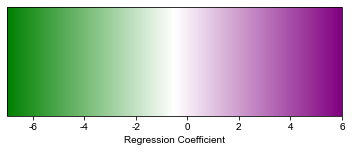

In [280]:
fig, ax = plt.subplots(figsize=(6,2))
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='horizontal',
             label='Regression Coefficient')
plt.show()
fig.savefig('../phylosig_itol/colorscale.pdf')

In [242]:
ko = list(path_df.sort_values('Regression coefficients')['KO identifier'])
g2ko = {g:[_ko  for _ko,v in info.items() if str(v)!='nan' ] 
        for g,info in subdf[ko].to_dict('index').items()}

In [276]:
for pname,path_df in data.groupby('Pathway'):
    ko = list(path_df.sort_values('Regression coefficients')['KO identifier'])
    g2ko = {g:[_ko  for _ko,v in info.items() if str(v)!='nan' ] 
        for g,info in subdf[ko].to_dict('index').items()}
    text = to_binary_shape(g2ko,{_ko:{'color':get_color(path_df.loc[path_df['KO identifier']==_ko,'Regression coefficients']),
                              'shape':'2',} for _ko in ko},
                           other_params={'#MARGIN,0':'MARGIN\t20\nHORIZONTAL_GRID\t0\nVERTICAL_GRID\t0'},
                           dataset_name=pname,
                    manual_v=ko)
    with open(f"../phylosig_itol/{pname.replace(' ','_').replace('/','_')}.txt",'w') as f1:
        f1.write(text)

In [277]:
!sz2 ../phylosig_itol*.txt

zsh:1: no matches found: ../phylosig_itol*.txt


In [256]:
os.system('mkdir -p ../phylosig_itol')

0

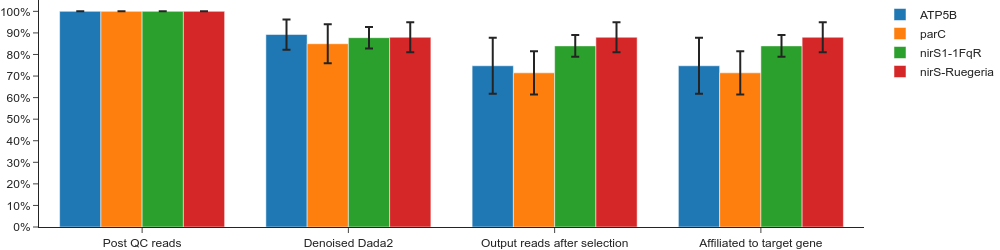

           genes Post QC reads Denoised Dada2 Output reads after selection  \
0          ATP5B   100.0 ± 0.0    89.25 ± 7.0                 74.76 ± 13.0   
1           parC   100.0 ± 0.0    84.99 ± 9.0                  71.5 ± 10.0   
2     nirS1-1FqR   100.0 ± 0.0     87.8 ± 5.0                  83.99 ± 5.0   
3  nirS-Ruegeria   100.0 ± 0.0    87.99 ± 7.0                  87.99 ± 7.0   

  Affiliated to target gene  
0              74.76 ± 13.0  
1               71.5 ± 10.0  
2               83.99 ± 5.0  
3               87.99 ± 7.0  


In [108]:
gene2c = {}
fs = glob('./rawdatas/stats*.xlsx')
collects = []
fig = go.Figure()
for f in [ './rawdatas/stats_ATP5B.xlsx',
 './rawdatas/stats_parC.xlsx',
    './rawdatas/stats_nirS1-1FqR.xlsx',
 './rawdatas/stats_nirS-Ruegeria.xlsx']:
    primer = f.split('/')[-1].split('_')[-1].split('.')[0]
    df = pd.read_excel(f,index_col=0)
    df = df.reindex([_ for _ in target_samples if _ in df.index])
    df = df.loc[~(df==0).all(1),:]
    xs = ['Post QC reads','Denoised Dada2','Output reads after selection',
          'Affiliated to target gene']
    ys = []
    errors = []
    for col in ['input reads', 'output reads_dada2',
       'output reads_after blastx & length selection',
       'reads_affiliated to targt gene']:
        c = (df[col].values/df['input reads'].values)* 100
        ys.append(round(c.mean(),2))
        errors.append(round(c.std()))
    collects.append([primer]+[f"{a} \u00B1 {b}" for a,b in zip(ys,errors)])
    fig.add_trace(go.Bar(
        name=primer,
        x=xs, y=ys,#marker={'color':gene2c.get(primer,'#1f77b4')},
        showlegend=True,
        error_y=dict(type='data', array=errors),text=ys))
fig.layout.yaxis.ticksuffix='%'
fig.layout.yaxis.dtick = 10
fig.layout.template='simple_white'
fig.layout.height = 250
fig.layout.width = 1000
fig.update_layout(margin_l=0,margin_t=0,margin_b=0,margin_r=0,font_family='Arial')
display(Image(fig.to_image()))

d = pd.DataFrame(collects)
d.columns = ['genes'] + xs
print(d)

In [109]:
fig.write_image('./stats.pdf')

## deblur

/home-user/thliao/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



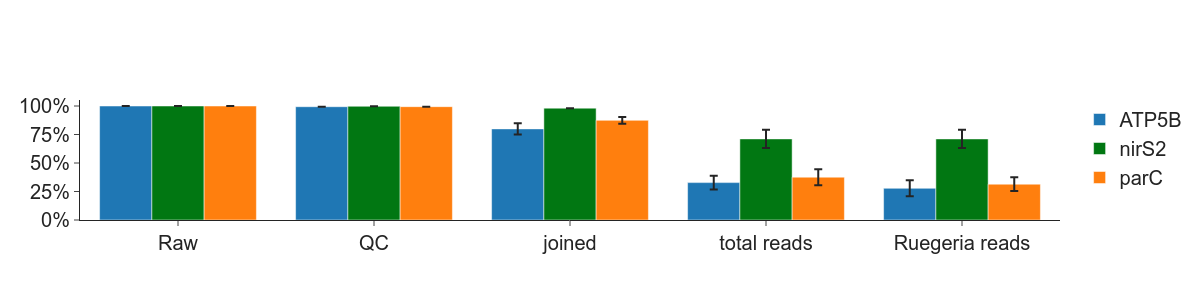

   genes          Raw           QC       joined  total reads Ruegeria reads
0  ATP5B  100.0 ± 0.0  99.38 ± 0.0  79.93 ± 5.0  32.79 ± 6.0    27.81 ± 7.0
1  nirS2  100.0 ± 0.0  99.75 ± 0.0  98.11 ± 0.0  71.14 ± 8.0    71.11 ± 8.0
2   parC  100.0 ± 0.0  99.41 ± 0.0  87.42 ± 3.0  37.56 ± 7.0    31.42 ± 6.0


In [74]:
gene2c = {'ATP5B':'#1f77b4','parC':'#ff7f0e','nirS2':'#017712'}
df = pd.read_excel('/mnt/ivy/thliao/project/coral_ruegeria/data_otheramplicons/raw_amplicon_stats.xlsx',index_col=0)
df.groupby('primer').size()
df = df.loc[~df['primer'].isin(['pccA']),:]

from Bio import SeqIO
collects = []
fig = go.Figure()
for x in ['ATP5B','nirS2','parC']:
    indir = f'/mnt/ivy/thliao/project/coral_ruegeria/data_otheramplicons/results/amplicon_{x}/20230811/deblur_output'
    fpath = f'{indir}/ASV_table.tsv'
    otutab = pd.read_csv(fpath,sep='\t',index_col=0)
    otutab = otutab.loc[:,[_ for _ in otutab.columns if _ in target_samples]]
    seqs = [_.id for _ in SeqIO.parse(join(dirname(fpath),'Positive_rep.fasta'),'fasta')]
    _df = df.loc[(df['primer']==x) & (df['sample ID'].isin(target_samples)),:]
    _df.loc[:,'total reads'] = list(otutab.sum(0).reindex(list(_df['sample ID'])).fillna(0))
    sdf = otutab.loc[seqs,:]
    _df.loc[:,'Ruegeria reads'] = list(sdf.sum(0).reindex(list(_df['sample ID'])).fillna(0))
    xs = ['Raw','QC','joined',
          'total reads','Ruegeria reads']
    ys = []
    errors = []
    for n in ['raw reads','clean reads','joined reads','total reads','Ruegeria reads']:
        c = (_df[n].values/_df['raw reads'].values)* 100
        ys.append(round(c.mean(),2))
        errors.append(round(c.std()))   
    fig.add_trace(go.Bar(
        name=x,
        x=xs, y=ys,marker={'color':gene2c[x]},showlegend=True,
        error_y=dict(type='data', array=errors),text=ys))
    collects.append([x]+[f"{a} \u00B1 {b}" for a,b in zip(ys,errors)])
fig.layout.font.size=20
fig.layout.yaxis.ticksuffix='%'
fig.layout.yaxis.dtick=25
fig.layout.template='simple_white'
fig.layout.height = 300
fig.layout.width = 1200
display(Image(fig.to_image()))

d = pd.DataFrame(collects)
d.columns = ['genes'] + xs
print(d)

## usearch

/home-user/thliao/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



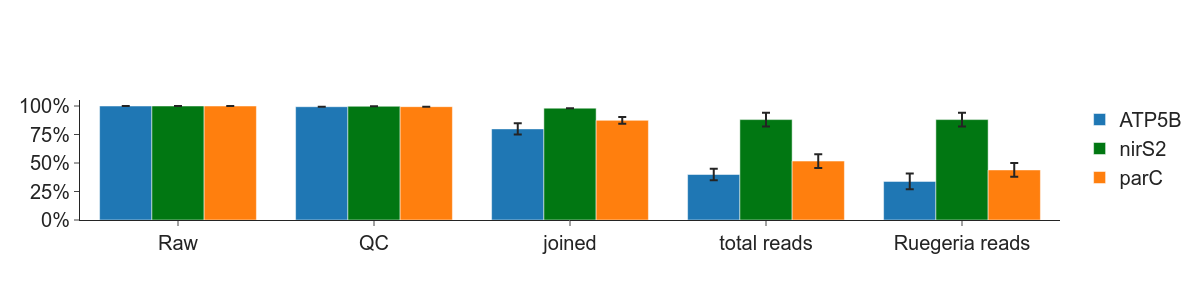

   genes          Raw           QC       joined  total reads Ruegeria reads
0  ATP5B  100.0 ± 0.0  99.38 ± 0.0  79.93 ± 5.0   39.9 ± 5.0    33.87 ± 7.0
1  nirS2  100.0 ± 0.0  99.75 ± 0.0  98.11 ± 0.0  88.07 ± 6.0    88.07 ± 6.0
2   parC  100.0 ± 0.0  99.41 ± 0.0  87.42 ± 3.0  51.69 ± 6.0    43.92 ± 6.0


In [73]:
gene2c = {'ATP5B':'#1f77b4','parC':'#ff7f0e','nirS2':'#017712'}
df = pd.read_excel('/mnt/ivy/thliao/project/coral_ruegeria/data_otheramplicons/raw_amplicon_stats.xlsx',index_col=0)
df.groupby('primer').size()
df = df.loc[~df['primer'].isin(['pccA']),:]

collects = []
fig = go.Figure()
for x in ['ATP5B','nirS2','parC']:
    indir = f'/mnt/ivy/thliao/project/coral_ruegeria/data_otheramplicons/results/amplicon_{x}/20230811/PUSEARCH'
    fpath = f'{indir}/ASV_table.tsv'
    if not exists(fpath):continue
    otutab = pd.read_csv(fpath,sep='\t',index_col=0)
    otutab = otutab.loc[:,[_ for _ in otutab.columns if _ in target_samples]]
    seqs = [_.id for _ in SeqIO.parse(join(dirname(fpath),'Positive_rep.fasta'),'fasta')]
    seqs = [_ for _ in seqs if _ in otutab.index]
    _df = df.loc[(df['primer']==x) & (df['sample ID'].isin(target_samples)),:]
    _df.loc[:,'total reads'] = list(otutab.sum(0).reindex(list(_df['sample ID'])).fillna(0))
    sdf = otutab.loc[seqs,:]
    _df.loc[:,'Ruegeria reads'] = list(sdf.sum(0).reindex(list(_df['sample ID'])).fillna(0))
    
    xs = ['Raw','QC','joined',
          'total reads','Ruegeria reads']
    ys = []
    errors = []
    for n in ['raw reads','clean reads','joined reads','total reads','Ruegeria reads']:
        c = (_df[n].values/_df['raw reads'].values)* 100
        ys.append(round(c.mean(),2))
        errors.append(round(c.std()))
    fig.add_trace(go.Bar(
        name=x,
        x=xs, y=ys,marker={'color':gene2c[x]},showlegend=True,
        error_y=dict(type='data', array=errors),text=ys))
    collects.append([x]+[f"{a} \u00B1 {b}" for a,b in zip(ys,errors)])
fig.layout.font.size=20
fig.layout.yaxis.ticksuffix='%'
fig.layout.yaxis.dtick=25
fig.layout.template='simple_white'
fig.layout.height = 300
fig.layout.width = 1200
display(Image(fig.to_image()))

d = pd.DataFrame(collects)
d.columns = ['genes'] + xs
print(d)

# pcoA or MDS or envfit

In [6]:
"""manually implemented python-version envfit"""

import pandas as pd
from sklearn.datasets import load_iris
from skbio.stats.ordination import pcoa
from math import sqrt
from scipy.spatial.distance import squareform, pdist
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# pcoa: get corrdination for each sample
def pcoa_coord(data,metric='euclidean'):

    dm = pd.DataFrame(squareform(pdist(data, metric=metric)),
                     index=data.index.tolist(),
                     columns=data.index.tolist())
    dm_pcoa = pcoa(dm,number_of_dimensions=2)
    coord = pd.DataFrame(dm_pcoa.samples.values, index=dm.index.tolist())
    # print(coord.head())
    return coord,dm_pcoa

def permutation_ntimes(perm_n=999,sample_n=150):
    perm_ind = dict()
    ori_ind = range(sample_n)
    for i in range(perm_n):
        perm_ind[i] = np.random.permutation(ori_ind)
    return perm_ind

def vectorfit(vector_env,coord,perm_n=99):
    vecs = vector_env.columns.tolist()
    reg = LinearRegression()
    vec_fit = dict()
    for vec in tqdm(vecs):
        reg = reg.fit(coord, vector_env[vec])
        head = reg.coef_
        tmp = sqrt(head[0] * head[0] + head[1] * head[1])
        arrow = head / tmp
        r = r2_score(vector_env[vec], reg.predict(coord))
        vec_fit[vec] = dict(r=r, X1=arrow[0], X2=arrow[1])

        perm_ind = permutation_ntimes(perm_n=perm_n, sample_n=vector_env.shape[0])
        perm_r = dict()
        for perm in perm_ind.keys():
            vec_shuffle = vector_env.iloc[[int(i) for i in perm_ind[perm]], :]
            vec_shuffle = vec_shuffle[vec]
            reg = reg.fit(coord, vec_shuffle)
            r_shuffle = r2_score(vec_shuffle, reg.predict(coord))
            perm_r[perm] = (r_shuffle >= r)
        pval = (sum([v for k, v in perm_r.items()]) + 1) / (len(perm_ind) + 1)
        vec_fit[vec]['pval'] = pval
    vec_fit_df = pd.DataFrame.from_dict(vec_fit).T
    # print(vec_fit_df)
    return vec_fit_df


def SS(fac_temp,dim='X1',fac_name='type'):
    fac_temp_gb = fac_temp[[dim,fac_name]].groupby(fac_name)
    mean = fac_temp_gb.mean()
    var = fac_temp_gb.var()
    n = fac_temp_gb.count()
    fac_summary = pd.concat([n,mean,var],axis=1)
    fac_summary.columns = ['n','mean','var']
    return fac_summary

def fac_fit(fac_temp,fac_name='type'):
    # fac = pd.DataFrame(env[fac_list])
    # fac_temp = pd.concat([fac_df, coord], axis=1)
    SS_X1 = SS(fac_temp,dim='X1',fac_name=fac_name)
    SST_X1 = dict(nt=SS_X1['n'].sum(),
                  mean=fac_temp['X1'].mean(),
                  var=fac_temp['X1'].var())
    SS_X2 = SS(fac_temp,dim='X2',fac_name=fac_name)
    SST_X2 = dict(nt=SS_X2['n'].sum(),
                  mean=fac_temp['X2'].mean(),
                  var=fac_temp['X2'].var())

    SSW = sum(SS_X1['n'] * SS_X1['var']) + sum(SS_X2['n'] * SS_X2['var'])
    SSB = sum(SS_X1['n']*((SS_X1['mean']-SST_X1['mean'])**2)) + sum(SS_X2['n']*((SS_X2['mean']-SST_X2['mean'])**2))
    return 1-SSW/(SSB+SSW)

def factorfit(fac_df_oh,coord,perm_n=999):

    perm_ind = permutation_ntimes(perm_n=perm_n, sample_n=fac_df_oh.shape[0])
    fac_list = fac_df_oh.columns.tolist()
    fac_fit_result = {}
    for fac in tqdm(fac_list):
        perm_r = dict()
        fac_df = pd.DataFrame(fac_df_oh[fac])
        fac_temp = pd.concat([coord, fac_df], axis=1)
        r = fac_fit(fac_temp, fac_name=fac)

        cen = dict()
        ff = fac_df[fac].unique()
        for f in ff:
            fac_ind = fac_df.loc[fac_df[fac] == f,].index.tolist()
            cen[f] = {'X1': coord.loc[fac_ind, 'X1'].sum() / len(fac_ind),
                      'X2': coord.loc[fac_ind, 'X2'].sum() / len(fac_ind)}

        for perm in perm_ind.keys():
            fac_shuffle = fac_df.iloc[[int(i) for i in perm_ind[perm]], :]
            fac_temp = coord.copy()
            fac_temp[fac] = fac_shuffle[fac].tolist()

            r_shuffle = fac_fit(fac_temp, fac_name=fac)
            perm_r[perm] = (r_shuffle >= r)
        pval = (sum([v for k, v in perm_r.items()]) + 1) / (len(perm_ind) + 1)
        fac_fit_result[fac] = dict(pval=pval, r=r, cen=cen)

    fac_other = []
    fac_cen = []
    for k,v in fac_fit_result.items():
        cen_key = 'cen'
        other_key = [i for i in v.keys() if i != cen_key]
        fac_other.append(pd.DataFrame.from_dict({k:{ok:v[ok] for ok in other_key}}).T)
        fac_cen.append(pd.DataFrame.from_dict({str(k)+'_'+str(i): v[cen_key][i] for i in v[cen_key].keys()}))
        # print(fac_cen)
    fac_other_df = pd.concat(fac_other,axis=0)
    fac_cen_df = pd.concat(fac_cen,axis=1).T
    return fac_other_df, fac_cen_df

In [7]:
cmap_l = {"YTW":"#6D0E09",
"PC":"#A00602",
"SW":"#274029",
"LC":"#414066",
"NP":"#048AA8",
"SI":"#99C24D",
"PI":"#A7C9B0"}

cmap_spec = {
    "ACRO": "#ffb74d",
    "PORI": "#03a9f4",
    "OUL": "#00c853",
    "PLAT": "#b30b00",
    "PLES": "#672a86",
    'FAVI': "#778AAE",
    "LEPT": "#000000",
}

symbol_map = {'SW':'circle', 'NP':'diamond', 
              'LC':'cross', 'BI':'x', 'PI':'star', 'SI':'diamond-tall',
             'YTW':'star-diamond'}

coral_symbol = {'PLAT':'circle', 'OUL':'diamond', 
              'PORI':'cross', 'LEPT':'x', 'FAVI':'star', }


cmap_g = {"sister group": "#689F38", "target": "#0277BD", "outgroup": "#E65100"}
cmap_c = {"M": "#D3D3D3", "T": "#A9A9A9", "S": "#455A64"}
cmap_spec = {
    "ACRO": "#ffb74d",
    "PORI": "#03a9f4",
    "OUL": "#00c853",
    "PLAT": "#b30b00",
    "PLES": "#672a86",
    'FAVI': "#778AAE",
    "LEPT": "#000000",}


In [8]:
from Bio import SeqIO
from skbio.stats.ordination import pcoa
from scipy.spatial.distance import pdist,squareform
import plotly.express as px
import warnings; warnings.filterwarnings('ignore')

def get1(v):
    if v <=1 and v!=0:
        return 1
    elif v>1:
        return int(v)
    return 0

gene2norm_df = {}   
gene2meta_fit = {}
for gene in tqdm(['ATP5B','parC','nirS2',
             'nirS']):
    if gene =='nirS':
        indir = f'/mnt/ivy/thliao/project/coral_ruegeria/data_otheramplicons/results/amplicon_{gene}/20230808/Pdada2_output'
        fpath = f'{indir}/finalized/positive_ASV_table.tsv'
        otutab = pd.read_csv(fpath,sep='\t',index_col=0)
        otutab.pop('sum')
        positive_otutab = otutab.copy()
        rarefy_df = (positive_otutab * positive_otutab.sum(0).min()/positive_otutab.sum(0)).applymap(get1)
        rarefy_df = rarefy_df.T
        norm_df = rarefy_df.div(rarefy_df.sum(1),axis=0)
        norm_df = norm_df.reindex([_ for _ in target_samples if _ in norm_df.index])
        norm_df = norm_df.loc[~norm_df.isna().all(1),:]
        print(gene,norm_df.shape)
    else:
        indir = f'/mnt/ivy/thliao/project/coral_ruegeria/data_otheramplicons/results/amplicon_{gene}/20230811/Pdada2_output'
        fpath = f'{indir}/ASV_table.tsv'
        otutab = pd.read_csv(fpath,sep='\t',index_col=0)
        seqs = [_.id for _ in SeqIO.parse(join(dirname(fpath),'Positive_rep.fasta'),'fasta')]
        seqs = [_ for _ in seqs if _ in otutab.index]
        positive_otutab = otutab.copy()
        rarefy_df = (positive_otutab * positive_otutab.sum(0).min()/positive_otutab.sum(0)).applymap(get1)
        rarefy_df = rarefy_df.T
        norm_df = rarefy_df.div(rarefy_df.sum(1),axis=0)
        norm_df = norm_df.reindex([_ for _ in target_samples if _ in norm_df.index])
        norm_df = norm_df.loc[~norm_df.isna().all(1),:]
        norm_df = norm_df.loc[:,seqs]
        print(gene,norm_df.shape)
    gene2norm_df[gene] = norm_df
    coord,pcoa_r = pcoa_coord(norm_df,metric='braycurtis')
    
    draw_df = coord.copy()
    draw_df = draw_df.iloc[:,:2]
    draw_df.columns = ['X1','X2']
    if draw_df.loc['YTW_OUL_T1','X1'] >= 0 and draw_df.loc['LC_OUL_S1','X1'] <=0:
        draw_df.loc[:,'X1'] = -draw_df['X1']
    
    draw_df.loc[:,'site'] = [_.split('_')[0] for _ in draw_df.index]
    draw_df.loc[:,'coral'] = [_.split('_')[1] for _ in draw_df.index]
    draw_df.loc[:,'compartment'] = [_.split('_')[2][0] for _ in draw_df.index]
    draw_df.loc[:,'W/E'] = ['East' if _ in ['YTW','PC'] else 'West'  
                           for _ in draw_df['site']]
    
    subcoord = coord.iloc[:,:2]
    subcoord.columns = ['X1','X2']
    fac_other_df, fac_cen_df = factorfit(draw_df.iloc[:,2:], subcoord, perm_n=999)
    fac_other_df.columns = ['pval','r2']
    gene2meta_fit[gene] = (fac_cen_df,fac_other_df,coord,pcoa_r)
    
    fig = px.scatter(draw_df,x='X1',y='X2',
                     color='site',symbol='coral',
                     color_discrete_map=cmap_l,symbol_map=coral_symbol)
    fig.update_traces(marker_size=10)
    fig.update_layout(font_size=10,template='simple_white',height=500,width=600,legend=dict(orientation = "h", yanchor="bottom",y=-0.4,xanchor="left", x=0),
                     margin_l=10,margin_r=10,margin_t=30,margin_b=10,
                     title_text=gene,title_x=0.5)
    a = pcoa_r.proportion_explained*100
    a1 = round(a[0],2)
    a2 = round(a[1],2)
    fig.update_layout(xaxis_title_text=f"NMDS1 ({a1}%)",yaxis_title_text=f"NMDS2 ({a2}%)",)
    display(Image(fig.to_image()))
    #fig.write_image(f'./NMDS_{gene}.pdf')

  0%|          | 0/4 [00:00<?, ?it/s]

ATP5B (66, 6641)



 50%|█████     | 2/4 [01:08<01:07, 33.86s/it]

nirS2 (68, 6439)



 75%|███████▌  | 3/4 [01:38<00:32, 32.05s/it]

nirS (68, 27044)



100%|██████████| 4/4 [02:09<00:00, 32.29s/it]


In [25]:
gene2EPD = {}
for gene,(fac_cen_df,fac_other_df,coord,pcoa_r) in tqdm(gene2meta_fit.items()):
    subcoord = coord.iloc[:,:2]
    subcoord.columns = ['X1','X2']
    norm_df = gene2norm_df[gene]
    norm_df.loc[:,'location'] = [_.split('_')[0] for _ in norm_df.index]
    new_EPD_df = norm_df.join(mdf,'location')
    new_EPD_df = new_EPD_df.loc[:,[_ for _ in new_EPD_df.columns if _[:2]!='MC' and _[:3] !='ASV']]
    new_EPD_df = new_EPD_df.iloc[:,3:]
    subEPDdf = new_EPD_df.loc[:,['Total Inorganic Nitrogen (mg/L)','Nitrite Nitrogen (mg/L)','Nitrate Nitrogen (mg/L)','Ammonia Nitrogen (mg/L)','Total Phosphorus (mg/L)','Turbidity (NTU)','Salinity (psu)','pH',]]
    subEPDdf.loc[:,'N/P ratio'] = subEPDdf['Total Inorganic Nitrogen (mg/L)']/subEPDdf['Total Phosphorus (mg/L)']
    #subEPDdf
    #new_EPD_df
    vecfit_df = vectorfit(subEPDdf, subcoord, perm_n=999)
    #fac_other_df.columns = ['pval','r2']
    gene2EPD[gene] = (vecfit_df,coord,pcoa_r)

100%|██████████| 4/4 [02:05<00:00, 31.30s/it]


In [ ]:
for _,cols in gene2EPD['nirS2'][0].iteritems():
    print(_)
    for _ in cols.values:
        print(round(_,3))
    #print(round(cols.values,3))

## nmds only

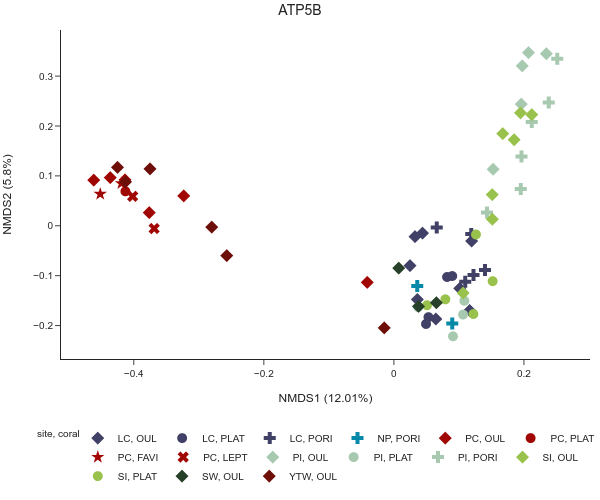

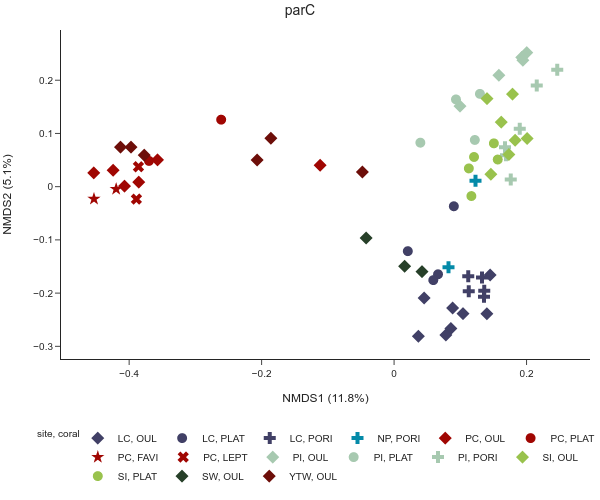

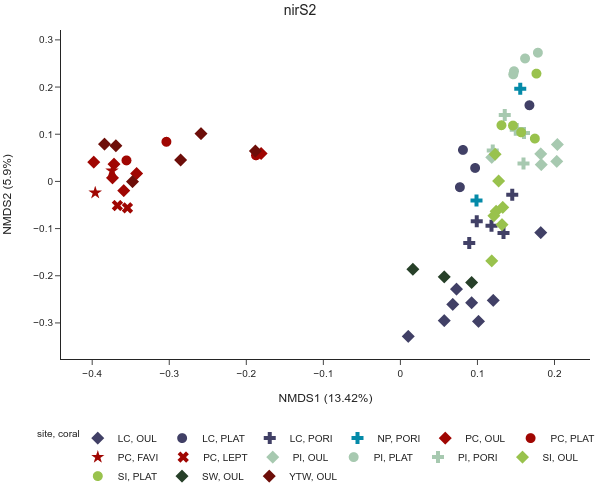

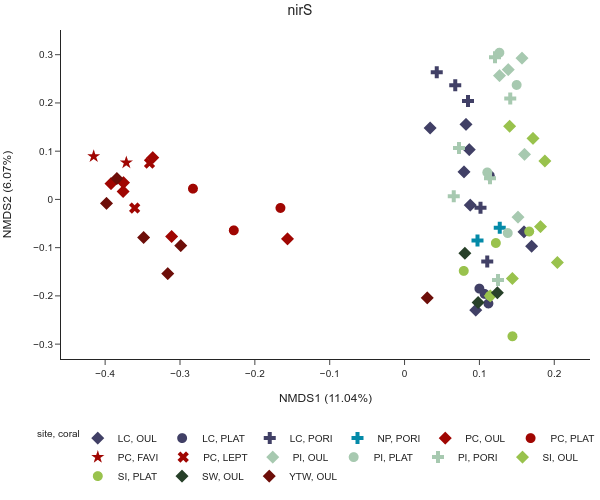

In [7]:
for gene,(fac_cen_df,fac_other_df,coord,pcoa_r) in gene2meta_fit.items():
    draw_df = coord.copy()
    draw_df = draw_df.iloc[:,:2]
    draw_df.columns = ['X1','X2']
    fac_cen_df = fac_cen_df.copy()
    fac_cen_df = fac_other_df.copy()
    if draw_df.loc['YTW_OUL_T1','X1'] >= 0 and draw_df.loc['LC_OUL_S1','X1'] <=0:
        draw_df.loc[:,'X1'] = -draw_df['X1']
    if gene in ['ATP5B','nirS']:
        draw_df.loc[:,'X2'] = -draw_df['X2']
    draw_df.loc[:,'site'] = [_.split('_')[0] for _ in draw_df.index]
    draw_df.loc[:,'coral'] = [_.split('_')[1] for _ in draw_df.index]
    draw_df.loc[:,'compartment'] = [_.split('_')[2][0] for _ in draw_df.index]
    draw_df.loc[:,'W/E'] = ['East' if _ in ['YTW','PC'] else 'West'  
                           for _ in draw_df['site']]
    
    subcoord = coord.iloc[:,:2]
    subcoord.columns = ['X1','X2']
    
    fig = px.scatter(draw_df,x='X1',y='X2',
                     color='site',symbol='coral',
                     color_discrete_map=cmap_l,symbol_map=coral_symbol)
    fig.update_traces(marker_size=10)
    fig.update_layout(font_size=10,template='simple_white',height=500,width=600,legend=dict(orientation = "h", yanchor="bottom",y=-0.4,xanchor="left", x=0),
                     margin_l=10,margin_r=10,margin_t=30,margin_b=10,
                     title_text=gene,title_x=0.5)
    a = pcoa_r.proportion_explained*100
    a1 = round(a[0],2)
    a2 = round(a[1],2)
    fig.update_layout(xaxis_title_text=f"NMDS1 ({a1}%)",yaxis_title_text=f"NMDS2 ({a2}%)",)
    display(Image(fig.to_image()))
    fig.write_image(f'./NMDS_{gene}.pdf')

## with envfit (factors)

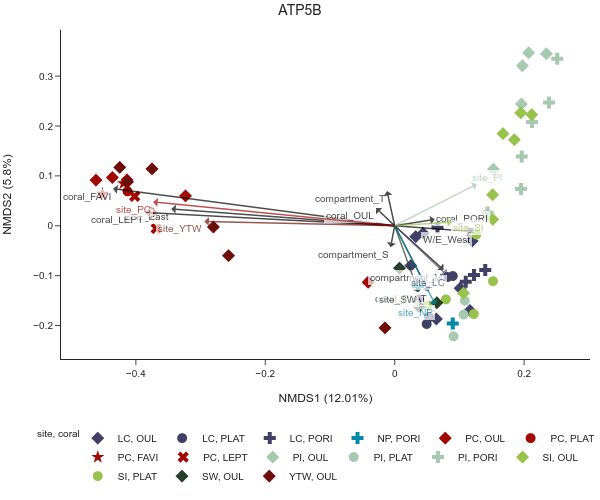

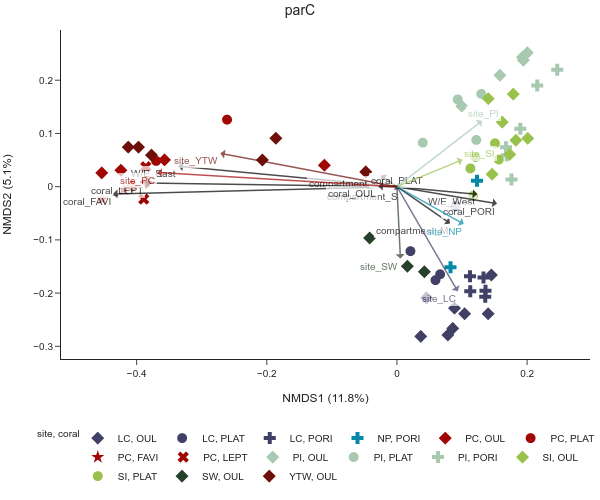

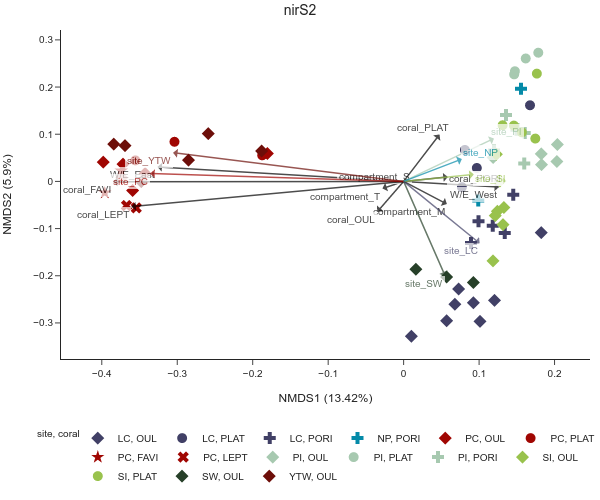

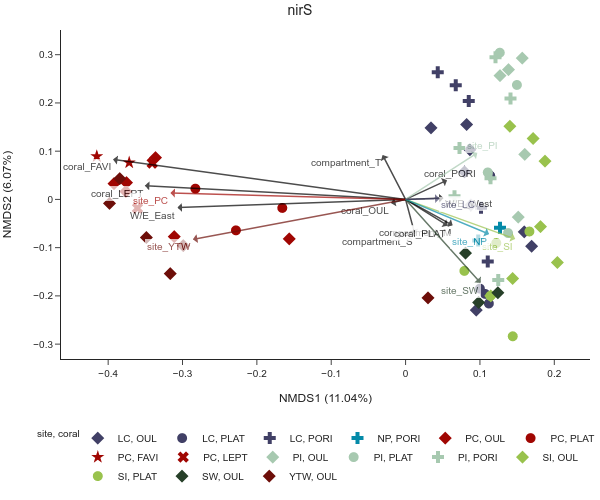

In [223]:
for gene,(fac_cen_df,fac_other_df,coord,pcoa_r) in gene2meta_fit.items():
    draw_df = coord.copy()
    draw_df = draw_df.iloc[:,:2]
    draw_df.columns = ['X1','X2']
    fac_cen_df = fac_cen_df.copy()
    fac_other_df = fac_other_df.copy()
    if draw_df.loc['YTW_OUL_T1','X1'] >= 0 and draw_df.loc['LC_OUL_S1','X1'] <=0:
        draw_df.loc[:,'X1'] = -draw_df['X1']
        fac_cen_df.loc[:,'X1'] = -fac_cen_df['X1']
    if gene in ['ATP5B','nirS']:
        draw_df.loc[:,'X2'] = -draw_df['X2']
        fac_cen_df.loc[:,'X2'] = -fac_cen_df['X2']
    draw_df.loc[:,'site'] = [_.split('_')[0] for _ in draw_df.index]
    draw_df.loc[:,'coral'] = [_.split('_')[1] for _ in draw_df.index]
    draw_df.loc[:,'compartment'] = [_.split('_')[2][0] for _ in draw_df.index]
    draw_df.loc[:,'W/E'] = ['East' if _ in ['YTW','PC'] else 'West'  
                           for _ in draw_df['site']]
    fig = px.scatter(draw_df,x='X1',y='X2',
                     color='site',symbol='coral',
                     color_discrete_map=cmap_l,symbol_map=coral_symbol)
    fig.update_traces(marker_size=10)
    fig.update_layout(font_size=10,template='simple_white',height=500,width=600,legend=dict(orientation = "h", yanchor="bottom",y=-0.4,xanchor="left", x=0),
                     margin_l=10,margin_r=10,margin_t=30,margin_b=10,
                     title_text=gene,title_x=0.5)
    a = pcoa_r.proportion_explained*100
    a1 = round(a[0],2)
    a2 = round(a[1],2)
    fig.update_layout(xaxis_title_text=f"NMDS1 ({a1}%)",yaxis_title_text=f"NMDS2 ({a2}%)",)

    collects = []
    for _,row in list(fac_cen_df.iterrows())[::-1]:
        if not _.startswith('site'):
            c = '#000'
        else:
            c = cmap_l[_.split('_')[-1]]
        arrow = go.layout.Annotation(dict(
                        x= 0,
                        y= 0,
                        xref="x",yref="y",
                        text=_,arrowside='start',
                        xanchor='right',yanchor='top',
                        showarrow=True,
                        axref = "x", ayref='y',
                        ax= row['X1'],
                        ay= row['X2'],bgcolor='#fff',font_color=c,
                        bordercolor='#fff',opacity=0.7,
                        arrowhead = 3,
                        arrowwidth=1.5,
                        arrowcolor=c,))
        collects.append(arrow)
    fig.update_layout(annotations= collects,)  
    display(Image(fig.to_image()))
    fig.write_image(f'./NMDS_{gene}_sampleinfos.pdf')

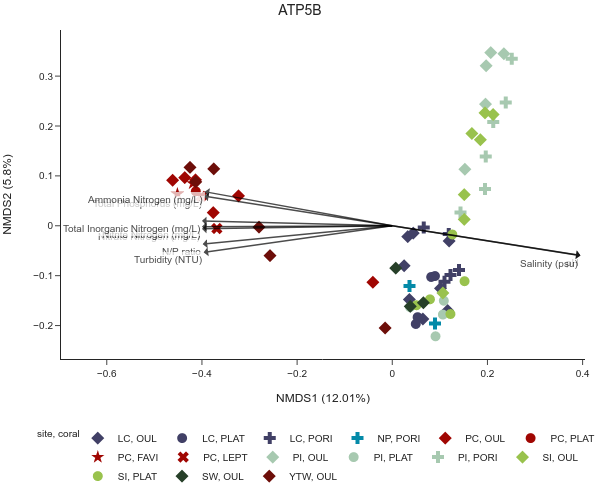

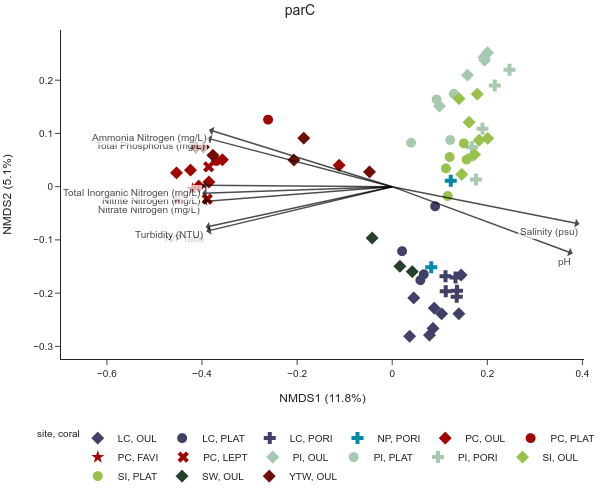

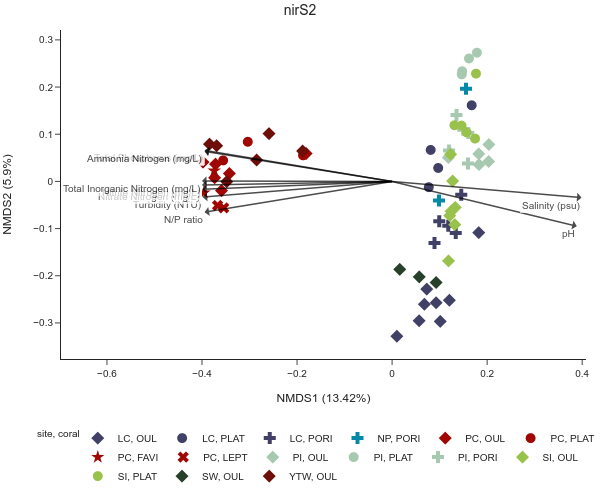

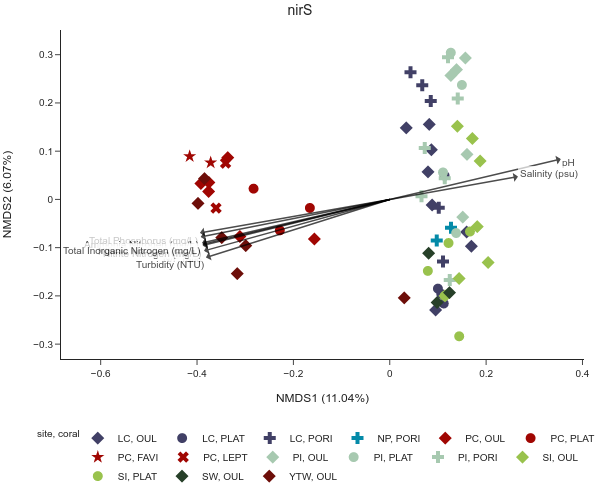

In [200]:
for gene,(fac_cen_df,coord,pcoa_r) in gene2EPD.items():
    draw_df = coord.copy()
    draw_df = draw_df.iloc[:,:2]
    draw_df.columns = ['X1','X2']
    fac_cen_df = fac_cen_df.copy()
    fac_other_df = fac_other_df.copy()
    if draw_df.loc['YTW_OUL_T1','X1'] >= 0 and draw_df.loc['LC_OUL_S1','X1'] <=0:
        draw_df.loc[:,'X1'] = -draw_df['X1']
        fac_cen_df.loc[:,'X1'] = -fac_cen_df['X1']
    if gene in ['ATP5B','nirS']:
        draw_df.loc[:,'X2'] = -draw_df['X2']
        fac_cen_df.loc[:,'X2'] = -fac_cen_df['X2']
    draw_df.loc[:,'site'] = [_.split('_')[0] for _ in draw_df.index]
    draw_df.loc[:,'coral'] = [_.split('_')[1] for _ in draw_df.index]
    draw_df.loc[:,'compartment'] = [_.split('_')[2][0] for _ in draw_df.index]
    draw_df.loc[:,'W/E'] = ['East' if _ in ['YTW','PC'] else 'West'  
                           for _ in draw_df['site']]
    fig = px.scatter(draw_df,x='X1',y='X2',
                     color='site',symbol='coral',
                     color_discrete_map=cmap_l,symbol_map=coral_symbol)
    fig.update_traces(marker_size=10)
    fig.update_layout(font_size=10,template='simple_white',height=500,width=600,legend=dict(orientation = "h", yanchor="bottom",y=-0.4,xanchor="left", x=0),
                     margin_l=10,margin_r=10,margin_t=30,margin_b=10,
                     title_text=gene,title_x=0.5)
    a = pcoa_r.proportion_explained*100
    a1 = round(a[0],2)
    a2 = round(a[1],2)
    fig.update_layout(xaxis_title_text=f"NMDS1 ({a1}%)",yaxis_title_text=f"NMDS2 ({a2}%)",)
    
    factor = 0.4
    collects = []
    for _,row in list(fac_cen_df.iterrows())[::-1]:
        if not _.startswith('site'):
            c = '#000'
        else:
            c = cmap_l[_.split('_')[-1]]
        arrow = go.layout.Annotation(dict(
                        x= 0,
                        y= 0,
                        xref="x",yref="y",
                        text=_,arrowside='start',
                        xanchor='right',yanchor='top',
                        showarrow=True,
                        axref = "x", ayref='y',
                        ax= row['X1']*factor,
                        ay= row['X2']*factor,bgcolor='#fff',font_color=c,
                        bordercolor='#fff',opacity=0.7,
                        arrowhead = 3,
                        arrowwidth=1.5,
                        arrowcolor=c,))
        collects.append(arrow)
    fig.update_layout(annotations= collects,)  
    display(Image(fig.to_image()))
    fig.write_image(f'./NMDS_{gene}_EPD.pdf')

In [201]:
!sz2 NMDS_*_EPD.pdf

NMDS_ATP5B_EPD.pdf                            100%   36KB  36.2KB/s   00:00    
NMDS_nirS2_EPD.pdf                            100%   36KB  35.9KB/s   00:00    
NMDS_nirS_EPD.pdf                             100%   35KB  35.3KB/s   00:00    
NMDS_parC_EPD.pdf                             100%   36KB  35.9KB/s   00:00    


In [202]:
gene2EPD['nirS2']

(                                        r        X1        X2   pval
 Total Inorganic Nitrogen (mg/L)  0.900461 -0.999996  0.002754  0.001
 Nitrite Nitrogen (mg/L)          0.856796 -0.999828 -0.018545  0.001
 Nitrate Nitrogen (mg/L)          0.899443 -0.999102 -0.042362  0.001
 Ammonia Nitrogen (mg/L)          0.897287 -0.987161  0.159728  0.001
 Total Phosphorus (mg/L)          0.941389 -0.986388  0.164437  0.001
 Turbidity (NTU)                  0.818132 -0.996511 -0.083461  0.001
 Salinity (psu)                   0.933469  0.996297 -0.085984  0.001
 pH                               0.799296  0.971495 -0.237061  0.001
 N/P ratio                        0.862526 -0.986558 -0.163412  0.001,
                    0         1
 LC_OUL_M1   0.072869 -0.228280
 LC_OUL_M2   0.010182 -0.328342
 LC_OUL_S1   0.182259 -0.108657
 LC_OUL_S2   0.101283 -0.296665
 LC_OUL_S3   0.120412 -0.252101
 ...              ...       ...
 YTW_OUL_S2 -0.258929  0.101248
 YTW_OUL_S3 -0.285110  0.045337
 YTW_OUL_T1

## with envfit (MC or genera)

In [43]:
mdf = pd.read_excel('/mnt/ivy/thliao/project/coral_ruegeria/info_RuegeriaUsed_20241022.xlsx',index_col=0)
subdf = mdf.loc[final_genomes]
subdf = subdf.loc[subdf.Source=='LuoLab',:]
g2pop = pd.read_csv('/mnt/ivy/thliao/project/coral_ruegeria/data_processing/PopCOGenT/output/MERGED_mc_20230324.tsv',sep='\t',index_col=0)
g2pop = g2pop['paper ID'].to_dict()

genome_list = pd.read_excel('/mnt/ivy/thliao/project/coral_ruegeria/ipynb/paper_denitrification/used_geomes_Feb8.xlsx',index_col=0)
final_genomes = list(genome_list.index)
final_genomes.remove('GNM3486')
len(final_genomes)



['AA5']

In [45]:
for ge in c:
    print(ge,len([_ for _ in final_genomes if g2pop.get(_,'') ==ge]))

MC1 8
MC6 11
MC13 28
MC18 4
MC0 48
MC3 48
MC7 10
MC12 2
MC17 4
MC19 7
MC20 1
MC21 8
MC26 9


In [ ]:
gene = 'ATP5B'
indir = f'/mnt/ivy/thliao/project/coral_ruegeria/data_otheramplicons/results/amplicon_{gene}/20230811/429strains_ref'
norm_MCdf = pd.read_csv(join(indir,'asv_IQtree/MC_abun.tsv'),sep='\t',index_col=0)
norm_MCdf = norm_MCdf.loc[gene2norm_df[gene].index,:]

norm_MCdf.loc[:,'MC17']
#MC20

In [35]:

gene2val_fit = {}
for gene,(fac_cen_df,fac_other_df,coord,pcoa_r) in tqdm(gene2meta_fit.items()):
    subcoord = coord.iloc[:,:2]
    subcoord.columns = ['X1','X2']
    if gene !='nirS':
        indir = f'/mnt/ivy/thliao/project/coral_ruegeria/data_otheramplicons/results/amplicon_{gene}/20230811/429strains_ref'
        norm_MCdf = pd.read_csv(join(indir,'asv_IQtree/MC_abun.tsv'),sep='\t',index_col=0)
        norm_MCdf = norm_MCdf.loc[gene2norm_df[gene].index,:]
        vec_fit_df = vectorfit(norm_MCdf, subcoord, perm_n=999)
        gene2val_fit[gene] = (vec_fit_df,norm_MCdf)
    else:
        norm_df = gene2norm_df[gene]
        norm_MCdf = pd.read_csv(join(indir,'asv_IQtree/MC_abun.tsv'),sep='\t',index_col=0)
        print('ori:',norm_MCdf.shape)
        if gene =='nirS2':
            norm_MCdf = norm_MCdf.loc[norm_MCdf['MC1']<40,:]
            print('aft:',norm_MCdf.shape)
        if gene =='ATP5B':
            norm_MCdf = norm_MCdf.loc[norm_MCdf['MC1']<40,:]
            print('aft:',norm_MCdf.shape)
        #gene = 'nirS'
        norm_df = gene2norm_df['nirS']
        tax_df = pd.read_csv('/mnt/ivy/thliao/project/coral_ruegeria/data_otheramplicons/ms_figures/rawdatas/tax_nirS1-1FqR.txt',sep='\t',index_col=0)
        d = tax_df['Genus'].to_dict()
        s = norm_df.T
        s.loc[:,'genus'] = [d[_] for _ in s.index]
        s = s.groupby('genus').sum()
        s = s.T
        s = s.loc[gene2norm_df[gene].index,:]
        vec_fit_df = vectorfit(s, subcoord, perm_n=999)
        gene2val_fit[gene] = (vec_fit_df,s)
    #break

 75%|███████▌  | 3/4 [05:58<01:55, 115.53s/it]

ori: (68, 29)


 75%|███████▌  | 3/4 [05:58<01:59, 119.53s/it]


KeyError: 'location'

In [38]:
c = '''MC1
MC6
MC13
MC18
MC0
MC3
MC7
MC12
MC17
MC19
MC20
MC21
MC26'''.split('\n')
[_ for _ in c if _ in gene2val_fit['ATP5B'][0].index]

['MC1',
 'MC6',
 'MC13',
 'MC18',
 'MC0',
 'MC3',
 'MC7',
 'MC12',
 'MC19',
 'MC21',
 'MC26']

In [ ]:
for k,v in gene2val_fit.items():
    print(k,v[0].loc['MC1',:])

In [80]:
genome_list = pd.read_excel('/mnt/ivy/thliao/project/coral_ruegeria/ipynb/paper_denitrification/used_geomes_Feb8.xlsx',index_col=0)
final_genomes = list(genome_list.index)
g2pop = pd.read_csv('/mnt/ivy/thliao/project/coral_ruegeria/data_processing/PopCOGenT/output/MERGED_mc_20230324.tsv',sep='\t',index_col=0)
g2pop = g2pop['paper ID'].to_dict()
[_ for _ in final_genomes if g2pop.get(_,'NA')=='MC40']

['BF12', 'CE8']

In [86]:
len(set([v for k,v in g2pop.items() if k in final_genomes]))

115

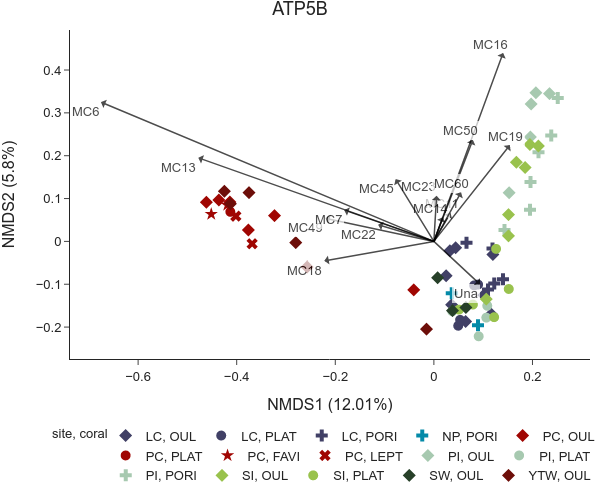

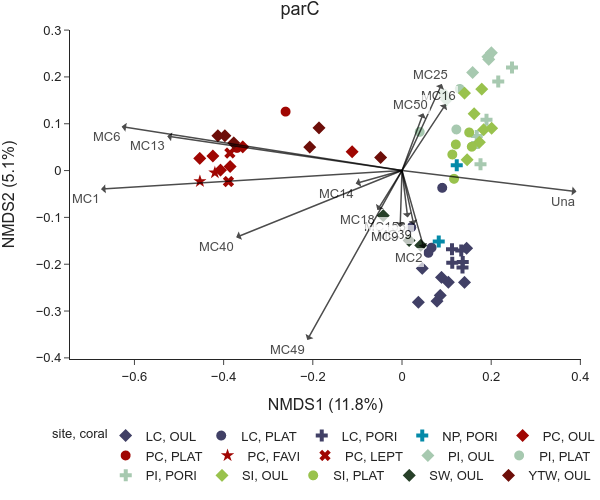

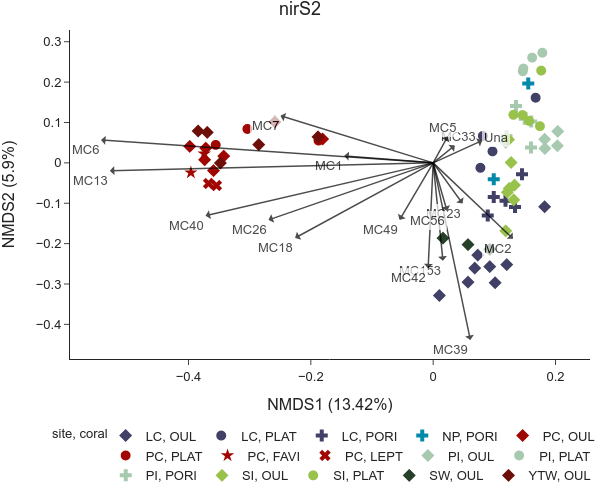

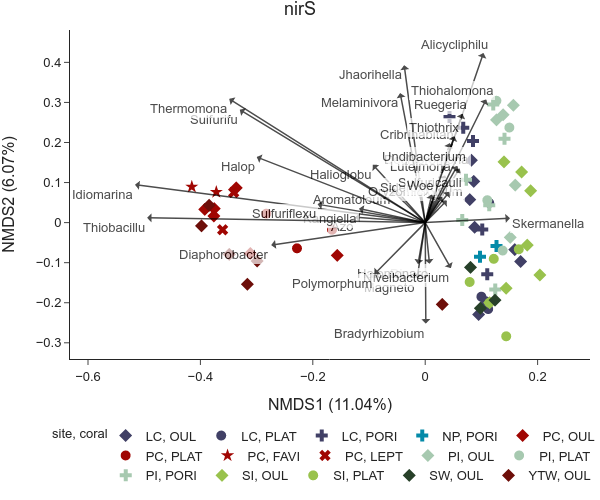

In [52]:
for gene,(fac_cen_df,fac_other_df,coord,pcoa_r) in gene2meta_fit.items():
    vec_fit_df = gene2val_fit[gene][0].copy()
    draw_df = coord.copy()
    draw_df = draw_df.iloc[:,:2]
    draw_df.columns = ['X1','X2']    
    if draw_df.loc['YTW_OUL_T1','X1'] >= 0 and draw_df.loc['LC_OUL_S1','X1'] <=0:
        draw_df.loc[:,'X1'] = -draw_df['X1']
        vec_fit_df.loc[:,'X1'] = -vec_fit_df['X1']
    if gene in ['ATP5B','nirS']:
        draw_df.loc[:,'X2'] = -draw_df['X2']
        vec_fit_df.loc[:,'X2'] = -vec_fit_df['X2']
    draw_df.loc[:,'site'] = [_.split('_')[0] for _ in draw_df.index]
    draw_df.loc[:,'coral'] = [_.split('_')[1] for _ in draw_df.index]
    draw_df.loc[:,'compartment'] = [_.split('_')[2][0] for _ in draw_df.index]
    draw_df.loc[:,'W/E'] = ['East' if _ in ['YTW','PC'] else 'West'  
                           for _ in draw_df['site']]
    fig = px.scatter(draw_df,x='X1',y='X2',
                     color='site',symbol='coral',
                     color_discrete_map=cmap_l,symbol_map=coral_symbol)
    fig.update_traces(marker_size=10)
    fig.update_layout(font_size=13,template='simple_white',height=500,width=600,legend=dict(orientation = "h", yanchor="bottom",y=-0.4,xanchor="left", x=0),
                     margin_l=10,margin_r=10,margin_t=30,margin_b=10,
                     title_text=gene,title_x=0.5)
    a = pcoa_r.proportion_explained*100
    a1 = round(a[0],2)
    a2 = round(a[1],2)
    fig.update_layout(xaxis_title_text=f"NMDS1 ({a1}%)",yaxis_title_text=f"NMDS2 ({a2}%)",)

    collects = []
    for _,row in list(vec_fit_df.iterrows()):
        if str(row['X1'])=='nan':
            continue   
        if row['pval']>0.05:continue
        if row['r']<=0.1:continue
        arrow = go.layout.Annotation(dict(
                        x= 0,
                        y= 0,
                        xref="x",yref="y",
                        text=_.split('s')[0],arrowside='start',
                        xanchor='right',yanchor='top',
                        showarrow=True,
                        axref = "x", ayref='y',
                        ax= row['X1']*row['r'],
                        ay= row['X2']*row['r'],
                        bgcolor='#fff',font_color='#000000',
                        bordercolor='#fff',opacity=0.7,
                        arrowhead = 2,
                        arrowwidth=1.5,
                        arrowcolor='#000',))
        collects.append(arrow)
    fig.update_layout(annotations= collects,)  
    display(Image(fig.to_image()))
    if gene == 'nirS':
        fig.write_image(f'./NMDS_{gene}_Genera.pdf')
    else:
        fig.write_image(f'./NMDS_{gene}_MC.pdf')

# unique MC abundance distribution

In [22]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np
import plotly.express as px

In [16]:
all_mcs = []
for gene,(vec_fit_df,norm_df) in gene2val_fit.items():
    if 'MC0' not in vec_fit_df.index:
        continue
    subdf = vec_fit_df.loc[(vec_fit_df['r']>=0.3) & (vec_fit_df['pval']<0.05),:]
    #print(subdf)
    all_mcs.extend(list(subdf.index))
all_mcs = sorted(list(set(all_mcs)))

In [52]:
ordered_sites = ['YTW', 'PC', 'SW','LC', 'NP','PI', 'SI',  ]

In [50]:
all_mcs = ['MC1',
 'MC6',
 'MC13',
 'MC18',
 'MC0',
 'MC3',
 'MC7',
 'MC12',
 'MC17',
 'MC19',
 'MC20',
 'MC21',
 'MC26']

In [112]:
from scipy.spatial.distance import cosine
for s in ['YTW','PC']:
    gene2mc2cos_dist = {}
    for gene,(fac_cen_df,fac_other_df,coord,pcoa_r) in gene2meta_fit.items():
        if gene == 'nirS':
            continue
        west = fac_cen_df.loc[f'site_{s}',:]   # typo. i
        vec_fit_df,norm_df = gene2val_fit[gene]
        _r = {}
        _d = {}
        _p = {}
        for mc in all_mcs:
            if mc not in vec_fit_df.index: 
                continue
            _d[mc] = cosine(west[['X1','X2']],vec_fit_df.loc[mc,['X1','X2']])
            _r[mc] = vec_fit_df.loc[mc,'r']
            _p[mc] = vec_fit_df.loc[mc,'pval']
        gene2mc2cos_dist[gene] = _d
        gene2mc2cos_dist[gene+' r2'] = _r
        gene2mc2cos_dist[gene+' pval'] = _p
    d = pd.DataFrame.from_dict(gene2mc2cos_dist)
    d.loc[:,['parC', 'ATP5B', 'nirS2']] = d.loc[:,['parC', 'ATP5B', 'nirS2']].fillna('NA')
    d.loc[:,['parC r2',  'ATP5B r2',  'nirS2 r2', ]] = d.loc[:,['parC r2',  'ATP5B r2',  'nirS2 r2', ]].fillna('NA')
    d.loc[:,['parC pval',  'ATP5B pval',  'nirS2 pval', ]] = d.loc[:,['parC pval',  'ATP5B pval',  'nirS2 pval', ]].fillna('NA')
    #d.loc[:,'mean'] = d.loc[:,['parC', 'ATP5B', 'nirS2']].mean(1)
    # for _,row in d.iterrows():
    #     d.loc[_,'mean'] = np.mean([row[gene] for gene in ['parC', 'ATP5B', 'nirS2'] if row[gene]!=1])
    # #d = d.loc[(d.loc[:,['parC r2',  'ATP5B r2',  'nirS2 r2', ]]>=0.5).any(1),:]
    # d = d.sort_values('mean')
    
    # d.columns = [f"cosine distance to site {s} ({_.split(' ')[0]})" if 'r2' not in _ else f"Envfit r2 ({_.split(' ')[0]})" 
    #          for _ in d.columns[:-1]] + ["average cosine distance"]
    # for _,row in d.iterrows():
    #     for c,v in row.to_dict().items():
    #         if v in [2,0]:
    #             d.loc[_,c] = 'NA'
    d = d.round(3)
    d = d.reindex(all_mcs)
    of = f'/mnt/ivy/thliao/project/coral_ruegeria/data_otheramplicons/ms_figures/{s}_correlated_MC.xlsx'
    d.to_excel(of,index=1)    
    #print(d)

In [117]:
import io 
b = pd.read_csv(io.StringIO(a),sep='\t')
b

,Genome ID,Coral species,Compartment,Sampling site,Ruegeria MC,Genome size/Mbp,narG,narH,napA,napB,nirS,nirK,norB,norC,nosZ
0,A5,Oulastrea crispata,mucus,BI,MC0,4.3Mbp,-,-,Y,Y,Y,-,Y,Y,Y
1,AA2,Oulastrea crispata,mucus,BI,MC0,4.34Mbp,-,-,Y,Y,Y,-,Y,Y,Y
2,AA4,Oulastrea crispata,mucus,BI,MC0,4.32Mbp,-,-,Y,Y,Y,-,Y,Y,Y
3,AA8,Oulastrea crispata,mucus,BI,MC0,4.43Mbp,-,-,Y,Y,Y,-,Y,Y,Y
4,AA9,Oulastrea crispata,mucus,BI,MC0,4.4Mbp,-,-,Y,Y,Y,-,Y,Y,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,GNM4649,Platygyra acuta,tissue,Hong Kong - Chek Chau,MC27,4.35Mbp,-,-,Y,Y,Y,-,Y,Y,Y
415,GNM4677,Platygyra acuta,skeleton,Hong Kong - Chek Chau,MC22,4.74Mbp,-,-,Y,Y,Y,-,Y,Y,Y
416,GNM4698,Platygyra acuta,skeleton,Hong Kong - Chek Chau,MC27,4.45Mbp,-,-,Y,Y,Y,-,Y,Y,Y
417,GNM4727,Platygyra acuta,skeleton,Hong Kong - Chek Chau,MC35,4.59Mbp,-,-,Y,Y,-,-,-,-,-


In [121]:
((b.narG=='Y') | (b.napA=='Y')) & ((b.nirS=='Y') | (b.nirK=='Y'))

0       True
1       True
2       True
3       True
4       True
       ...  
414     True
415     True
416     True
417    False
418     True
Length: 419, dtype: bool

In [123]:
subb = b.loc[((b.narG=='Y') | (b.napA=='Y')) & ((b.nirS=='Y') | (b.nirK=='Y')) & (b.norB=='Y') & (b.nosZ=='Y'),:]

In [131]:
b.loc[((b.narG=='-') & (b.napA=='-')) & ((b.nirS=='-') & (b.nirK=='-')) & (b.norB=='-') & (b.nosZ=='-'),:].shape

(14, 15)

In [114]:
!sz2 /mnt/ivy/thliao/project/coral_ruegeria/data_otheramplicons/ms_figures/*_correlated*.xlsx

PC_correlated_MC.xlsx                         100% 6558     6.4KB/s   00:00    
YTW_correlated_MC.xlsx                        100% 6552     6.4KB/s   00:00    


In [100]:
from collections import defaultdict
pop2g = defaultdict(list)
for g in final_genomes:
    pop2g[g2pop.get(g,'NA')].append(g)
print(len(pop2g['MC20']))

1


In [75]:
for a in d.reindex(all_mcs).iloc[:,0]:
    if str(a)=='nan' or str(a)=='NA':
        print('NA')
    elif a>=1:
        print(1)
    else:
        print(round(a,3))

0.136
0.051
0.034
0.053
1
0.299
0.032
1
NA
1
NA
0.001
1


In [66]:
d.reindex(all_mcs)

,cosine distance to site YTW (ATP5B),Envfit r2 (ATP5B),cosine distance to site YTW (parC),Envfit r2 (parC),cosine distance to site YTW (nirS2),Envfit r2 (nirS2),average cosine distance
MC1,0.09074,0.03924,0.040644,0.676156,0.002965,0.146393,0.044783
MC6,0.086566,0.749448,0.003121,0.635709,0.004294,0.545951,0.031327
MC13,0.063473,0.516142,0.003945,0.531617,0.027097,0.52891,0.031505
MC18,0.026447,0.226906,0.655556,0.100863,0.367082,0.292356,0.349695
MC0,1.447006,0.09662,1.895261,0.017547,1.960921,0.011562,1.767729
MC3,0.232963,0.05159,0.025912,0.097448,0.026218,0.050183,0.095031
MC7,0.061644,0.196079,0.035953,0.074281,0.028723,0.275404,0.042107
MC12,1.273883,0.043814,0.323643,0.081457,0.009635,0.046512,0.535721
MC17,NA,NA,1.993440,0.028351,NA,NA,1.997813
MC19,1.541192,0.325007,1.391440,0.088079,NA,NA,1.644211


In [1]:
!ls /mnt/ivy/thliao/project/coral_ruegeria/data_otheramplicons/ms_figures/*.xlsx

/mnt/ivy/thliao/project/coral_ruegeria/data_otheramplicons/ms_figures/denitrification_pattern.xlsx
/mnt/ivy/thliao/project/coral_ruegeria/data_otheramplicons/ms_figures/MC_abundance_mean.xlsx
/mnt/ivy/thliao/project/coral_ruegeria/data_otheramplicons/ms_figures/Site2station_EPD.xlsx
/mnt/ivy/thliao/project/coral_ruegeria/data_otheramplicons/ms_figures/top10MC.xlsx
/mnt/ivy/thliao/project/coral_ruegeria/data_otheramplicons/ms_figures/YTW_correlated_MC.xlsx


In [2]:
!sz2 /mnt/ivy/thliao/project/coral_ruegeria/data_otheramplicons/ms_figures/YTW_correlated_MC.xlsx

YTW_correlated_MC.xlsx                        100% 6547     6.4KB/s   00:00    


# ms abstract

In [20]:
d = pd.DataFrame()
_c = 0
print("MC\tGene\tYTW\tPC\tothers")
for mc in ['MC1','MC6','MC13']:
    for idx,gene in enumerate(['parC','ATP5B']):
        indir = f'/mnt/ivy/thliao/project/coral_ruegeria/data_otheramplicons/results/amplicon_{gene}/20230811/429strains_ref'
        norm_df = pd.read_csv(join(indir,'asv_IQtree/MC_abun.tsv'),sep='\t',index_col=0)
        #norm_df = norm_df.reindex(gene2meta_fit[gene][2].index)
        ytw = round(np.mean([v for k,v in norm_df[mc].to_dict().items() if k.split('_')[0] == 'YTW']),2)
        PC = round(np.mean([v for k,v in norm_df[mc].to_dict().items() if k.split('_')[0] == 'PC']),2)
        others = round(np.mean([v for k,v in norm_df[mc].to_dict().items() if k.split('_')[0] in ['BI','NP','SI','SW','LC',"PI"]]),2)
        # d.loc[_c,
        _c+=1
        print(f"{mc}\t{gene}\t{ytw}%\t{PC}%\t{others}%")

MC	Gene	YTW	PC	others
MC1	parC	1.49%	3.48%	0.5%
MC1	ATP5B	1.83%	8.78%	0.47%
MC6	parC	6.29%	8.51%	1.38%
MC6	ATP5B	6.91%	7.93%	1.72%
MC13	parC	0.24%	1.54%	0.02%
MC13	ATP5B	0.33%	2.55%	0.06%


In [ ]:
mc='MC1'

for idx,gene in enumerate(['parC','ATP5B','nirS2']):
    indir = f'/mnt/ivy/thliao/project/coral_ruegeria/data_otheramplicons/results/amplicon_{gene}/20230811/Pdada2_output'
    norm_df = pd.read_csv(join(indir,'asv_IQtree/MC_abun.tsv'),sep='\t',index_col=0)
    norm_df = norm_df.reindex(gene2meta_fit[gene][2].index)
    if mc not in norm_df.columns:
        norm_df.loc[:,mc]=0
    site2mean = defaultdict(list)
    norm_df.loc[norm_df.loc[:,'MC1']<40,:]

In [378]:
norm_df.loc[:,'coral'] = [_.split('_')[1] for _ in norm_df.index]
norm_df['coral'].unique()

array(['OUL', 'PLAT', 'PORI', 'FAVI', 'LEPT'], dtype=object)

In [44]:
ssss_mc = ['MC1','MC6','MC13','MC87','MC225']
ssss_mc = list(set(ssss_mc))
ordered_sites = ['YTW', 'PC', 'SW','LC', 'NP','PI', 'SI',  ]
for idx,gene in enumerate(['parC','ATP5B','nirS2']):
    indir = f'/mnt/ivy/thliao/project/coral_ruegeria/data_otheramplicons/results/amplicon_{gene}/20230811/Pdada2_output'
    norm_df = pd.read_csv(join(indir,'asv_IQtree/MC_abun.tsv'),sep='\t',index_col=0)
    norm_df = norm_df.reindex(gene2meta_fit[gene][2].index)
    norm_df.loc[:,'coral'] = [_.split('_')[1] for _ in norm_df.index]
    norm_df = norm_df.loc[norm_df.coral.isin(['OUL','PLAT','PORI'])]
    site2mean = defaultdict(list)
    for mc in norm_df.columns[:-3]:
        asv_d = norm_df[mc].to_dict()
        asv_d = {k:v for k,v in asv_d.items()}
        # if subdf[mc].median()>=1:
        #     print(mc,subdf[mc].median())
        #print(mc,subdf[mc].median())
        for s in ordered_sites:
            s = s #+f'_{coral}'
            xs = [_ for _ in norm_df.index if _.split('_')[0] == s]
            ys = [asv_d.get(_,0) if _ in asv_d else 0 for _ in xs]
            site2mean[s].append(np.mean(ys))        
        if (site2mean['YTW'][0] >=0.1 and site2mean['PC'][0] >=0.1) and len([ss for ss in ['SW','LC', 'NP','PI', 'SI',] if site2mean[ss][0]>=0.1])>2:
            ssss_mc.append(mc)

In [72]:
mcmean_df = pd.DataFrame(columns=['total mean±std/%'])
for idx,gene in enumerate(['parC','ATP5B','nirS2']):
    indir = f'/mnt/ivy/thliao/project/coral_ruegeria/data_otheramplicons/results/amplicon_{gene}/20230811/429strains_ref'
    norm_df = pd.read_csv(join(indir,'asv_IQtree/MC_abun.tsv'),sep='\t',index_col=0)
    norm_df = norm_df.reindex(gene2meta_fit[gene][2].index)
    norm_df.loc[:,'coral'] = [_.split('_')[1] for _ in norm_df.index]
    norm_df = norm_df.loc[norm_df.coral.isin(['OUL','PLAT','PORI'])]
    for mc in [_ for _ in norm_df.columns if _.startswith("MC")]:
        mcmean_df.loc[mc+' ' + gene,'total mean±std/%'] = f"{round(norm_df[mc].mean(),2)} ± {round(norm_df[mc].std(),2)}"
    
        site2mean = defaultdict(list)
        asv_d = norm_df[mc].to_dict()
        asv_d = {k:v for k,v in asv_d.items()}
        for s in ordered_sites:
            xs = [_ for _ in norm_df.index if _.split('_')[0] == s]
            ys = [asv_d.get(_,0) if _ in asv_d else 0 for _ in xs]
            mcmean_df.loc[mc+' ' + gene,f'{s} mean±std/%'] = f"{round(np.mean(ys),2)} ± {round(np.std(ys),2)}"

In [75]:
mcmean_df.to_excel('/mnt/ivy/thliao/project/coral_ruegeria/data_otheramplicons/ms_figures/MC_abundance_mean.xlsx')

MC20 parC 0.0 0.0
MC20 ATP5B 0.0 0.0
MC20 nirS2 0.0 0.0


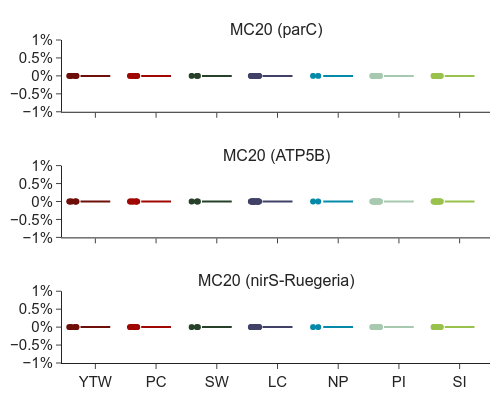

MC11s3 parC 0.57 0.55
MC11s3 ATP5B 0.61 1.04
MC11s3 nirS2 0.16 0.42


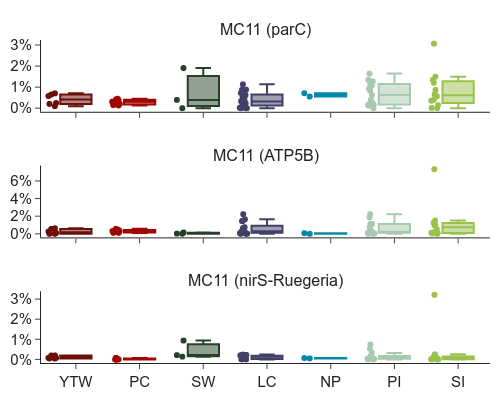

MC107 parC 0.0 0.0
MC107 ATP5B 0.0 0.0
MC107 nirS2 0.0 0.0


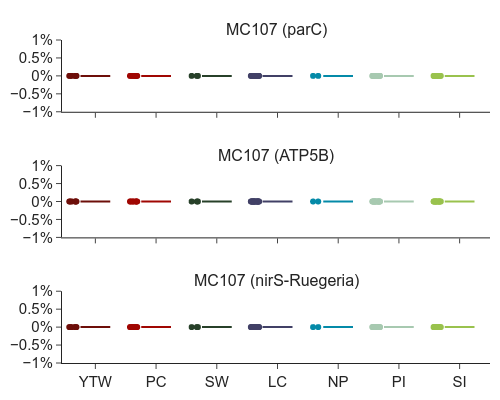

MC17 parC 0.02 0.07
MC17 ATP5B 0.0 0.0
MC17 nirS2 0.0 0.0


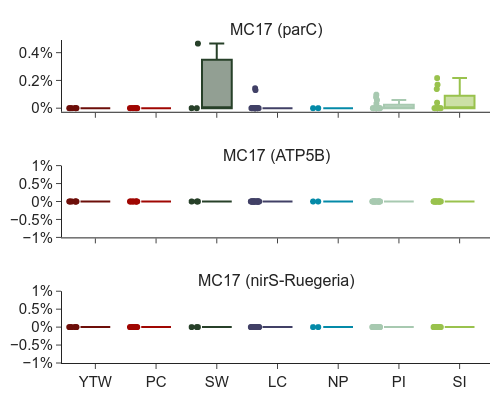

MC103 parC 0.0 0.0
MC103 ATP5B 0.0 0.0
MC103 nirS2 0.0 0.0


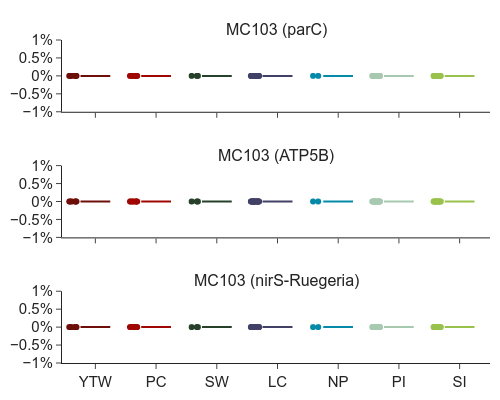

MC12 parC 0.03 0.08
MC12 ATP5B 0.01 0.04
MC12 nirS2 0.21 0.52


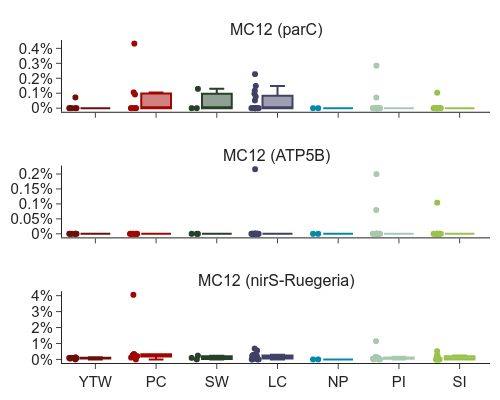

MC14 parC 0.0 0.01
MC14 ATP5B 0.0 0.01
MC14 nirS2 0.0 0.01


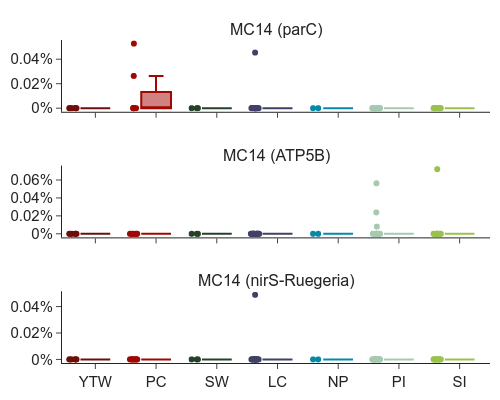

In [79]:
ssss_mc = ['MC12','MC107','MC20','MC17','MC14','MC11s3','MC103']
    # 'MC1','MC6','MC13','MC87','MC225']
ssss_mc = list(set(ssss_mc))

from collections import defaultdict
generename = {'parC':"parC",'ATP5B':"ATP5B",'nirS2':'nirS-Ruegeria'}
of2v = {}
ofs = []
for mc in ssss_mc:
#mc = 'MC46'
    fig = make_subplots(rows=3,cols=1,shared_xaxes=True,
                        subplot_titles=[f"{mc.split('s')[0]} ({generename[gene]})" for gene in ['parC','ATP5B','nirS2']])
    ordered_sites = ['YTW', 'PC', 'SW','LC', 'NP','PI', 'SI',  ]
    for idx,gene in enumerate(['parC','ATP5B','nirS2']):
        indir = f'/mnt/ivy/thliao/project/coral_ruegeria/data_otheramplicons/results/amplicon_{gene}/20230811/429strains_ref'
        norm_df = pd.read_csv(join(indir,'asv_IQtree/MC_abun.tsv'),sep='\t',index_col=0)
        norm_df = norm_df.reindex(gene2meta_fit[gene][2].index)
        norm_df.loc[:,'coral'] = [_.split('_')[1] for _ in norm_df.index]
        norm_df = norm_df.loc[norm_df.coral.isin(['OUL','PLAT','PORI'])]
        if mc not in norm_df.columns:
            norm_df.loc[:,mc]=0
        print(mc,gene,round(norm_df[mc].mean(),2),round(norm_df[mc].std(),2))
        #for coral,subdf in norm_df.groupby('coral'):
        site2mean = defaultdict(list)
        asv_d = norm_df[mc].to_dict()
        asv_d = {k:v for k,v in asv_d.items()}
        for s in ordered_sites:
            s = s #+f'_{coral}'
            xs = [_ for _ in norm_df.index if _.split('_')[0] == s]
            ys = [asv_d.get(_,0) if _ in asv_d else 0 for _ in xs]

            if gene == 'ATP5B' and mc =='MC1':
                _xs = [k for k,v in zip(xs,ys) if v <=40]
                _ys = [v for k,v in zip(xs,ys) if v <=40]
                xs,ys = _xs,_ys
            if gene == 'nirS2' and mc =='MC1':
                _xs = [k for k,v in zip(xs,ys) if v <=20]
                _ys = [v for k,v in zip(xs,ys) if v <=20]
                xs,ys = _xs,_ys
            fig.append_trace(go.Box(
                name=s,
                marker=dict(color=cmap_l[s.split('_')[0]]),
                showlegend=False,boxpoints='all',
                x=[s]*len(ys), y=ys,
            ),idx+1,1)
            site2mean[s].append(np.mean(ys))
        fig.layout.font.size=15
        fig.layout.template='simple_white'
        #fig.layout.title.text = f"{mc} ({gene})"
        #fig.layout.title.x = 0.5
        #fig.layout.xaxis.ticktext = xs
        #fig.layout.xaxis.tickvals = xs
        #fig.layout.yaxis.dtick = 5
        fig.update_yaxes(ticksuffix = '%')
        #fig.layout.update_yaxis.ticksuffix = '%'
        fig.layout.height = 400
        fig.layout.width = 500
        fig.update_layout(margin_l=10,margin_r=10,margin_t=40,margin_b=10)
        #max_v = np.max(site2mean['YTW'])
    display(Image(fig.to_image()))
    fig.write_image(f'/mnt/ivy/thliao/project/coral_ruegeria/data_otheramplicons/ms_figures/{mc}_siteabundance.pdf')
    fig.write_image(f'/mnt/ivy/thliao/project/coral_ruegeria/data_otheramplicons/ms_figures/{mc}_siteabundance.svg')

MC7 parC 0.06 0.24
MC7 ATP5B 0.01 0.03
MC7 nirS2 0.23 0.56


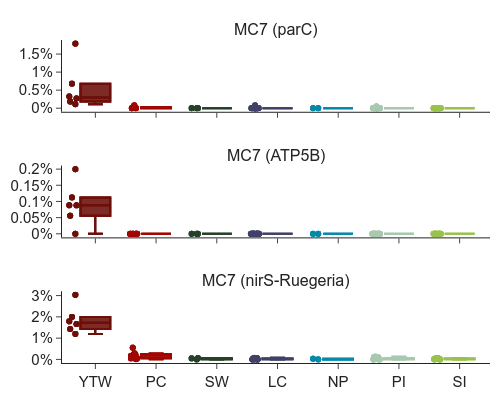

MC18 parC 0.05 0.14
MC18 ATP5B 0.49 1.08
MC18 nirS2 0.38 0.71


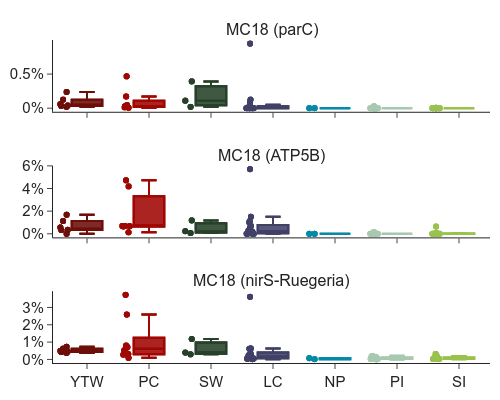

In [56]:
ssss_mc = ['MC7','MC18']
    # 'MC1','MC6','MC13','MC87','MC225']
ssss_mc = list(set(ssss_mc))

from collections import defaultdict
generename = {'parC':"parC",'ATP5B':"ATP5B",'nirS2':'nirS-Ruegeria'}
of2v = {}
ofs = []
for mc in ssss_mc:
#mc = 'MC46'
    fig = make_subplots(rows=3,cols=1,shared_xaxes=True,
                        subplot_titles=[f"{mc.split('s')[0]} ({generename[gene]})" for gene in ['parC','ATP5B','nirS2']])
    ordered_sites = ['YTW', 'PC', 'SW','LC', 'NP','PI', 'SI',  ]
    for idx,gene in enumerate(['parC','ATP5B','nirS2']):
        indir = f'/mnt/ivy/thliao/project/coral_ruegeria/data_otheramplicons/results/amplicon_{gene}/20230811/429strains_ref'
        norm_df = pd.read_csv(join(indir,'asv_IQtree/MC_abun.tsv'),sep='\t',index_col=0)
        norm_df = norm_df.reindex(gene2meta_fit[gene][2].index)
        norm_df.loc[:,'coral'] = [_.split('_')[1] for _ in norm_df.index]
        norm_df = norm_df.loc[norm_df.coral.isin(['OUL','PLAT','PORI'])]
        if mc not in norm_df.columns:
            norm_df.loc[:,mc]=0
        print(mc,gene,round(norm_df[mc].mean(),2),round(norm_df[mc].std(),2))
        for coral,subdf in norm_df.groupby('coral'):
            site2mean = defaultdict(list)
            asv_d = norm_df[mc].to_dict()
            asv_d = {k:v for k,v in asv_d.items()}
            if subdf[mc].median()>=1:
                print(mc,subdf[mc].median())
            #print(mc,subdf[mc].median())
            for s in ordered_sites:
                s = s #+f'_{coral}'
                xs = [_ for _ in norm_df.index if _.split('_')[0] == s]
                ys = [asv_d.get(_,0) if _ in asv_d else 0 for _ in xs]
                
                if gene == 'ATP5B' and mc =='MC1':
                    _xs = [k for k,v in zip(xs,ys) if v <=40]
                    _ys = [v for k,v in zip(xs,ys) if v <=40]
                    xs,ys = _xs,_ys
                if gene == 'nirS2' and mc =='MC1':
                    _xs = [k for k,v in zip(xs,ys) if v <=20]
                    _ys = [v for k,v in zip(xs,ys) if v <=20]
                    xs,ys = _xs,_ys
                fig.append_trace(go.Box(
                    name=s,
                    marker=dict(color=cmap_l[s.split('_')[0]]),
                    showlegend=False,boxpoints='all',
                    x=[s]*len(ys), y=ys,
                ),idx+1,1)
                site2mean[s].append(np.mean(ys))
            fig.layout.font.size=15
            fig.layout.template='simple_white'
            #fig.layout.title.text = f"{mc} ({gene})"
            #fig.layout.title.x = 0.5
            #fig.layout.xaxis.ticktext = xs
            #fig.layout.xaxis.tickvals = xs
            #fig.layout.yaxis.dtick = 5
            fig.update_yaxes(ticksuffix = '%')
            #fig.layout.update_yaxis.ticksuffix = '%'
            fig.layout.height = 400
            fig.layout.width = 500
            fig.update_layout(margin_l=10,margin_r=10,margin_t=40,margin_b=10)
            #max_v = np.max(site2mean['YTW'])
    display(Image(fig.to_image()))
    fig.write_image(f'/mnt/ivy/thliao/project/coral_ruegeria/data_otheramplicons/ms_figures/{mc}_siteabundance.pdf')
    fig.write_image(f'/mnt/ivy/thliao/project/coral_ruegeria/data_otheramplicons/ms_figures/{mc}_siteabundance.svg')

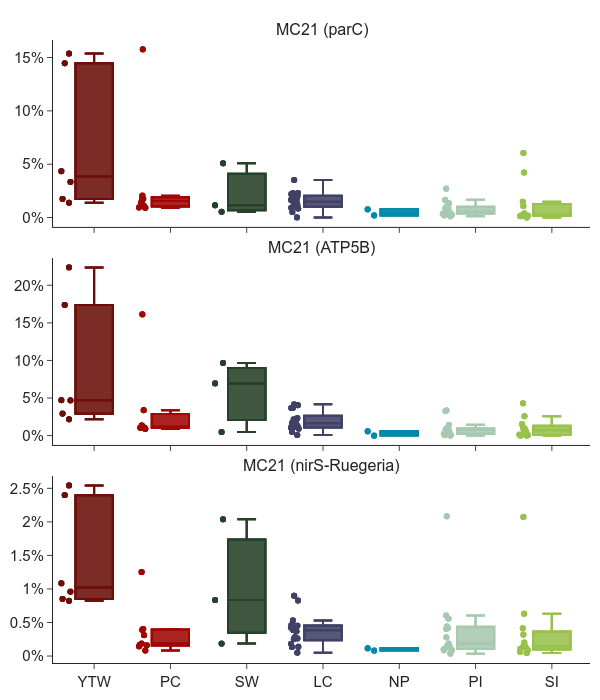

In [74]:
from collections import defaultdict
generename = {'parC':"parC",'ATP5B':"ATP5B",'nirS2':'nirS-Ruegeria'}
of2v = {}
ofs = []
mc = 'MC21'
fig = make_subplots(rows=3,cols=1,shared_xaxes=True,
                    vertical_spacing=0.05,
                    subplot_titles=[f"{mc.split('s')[0]} ({generename[gene]})" for gene in ['parC','ATP5B','nirS2']])
ordered_sites = ['YTW', 'PC', 'SW','LC', 'NP','PI', 'SI',  ]
for idx,gene in enumerate(['parC','ATP5B','nirS2']):
    indir = f'/mnt/ivy/thliao/project/coral_ruegeria/data_otheramplicons/results/amplicon_{gene}/20230811/Pdada2_output'
    norm_df = pd.read_csv(join(indir,'asv_IQtree/MC_abun.tsv'),sep='\t',index_col=0)
    norm_df = norm_df.reindex(gene2meta_fit[gene][2].index)
    norm_df.loc[:,'coral'] = [_.split('_')[1] for _ in norm_df.index]
    norm_df = norm_df.loc[norm_df.coral.isin(['OUL','PLAT','PORI'])]
    if mc not in norm_df.columns:
        norm_df.loc[:,mc]=0
    for coral,subdf in norm_df.groupby('coral'):
        site2mean = defaultdict(list)
        asv_d = norm_df[mc].to_dict()
        asv_d = {k:v for k,v in asv_d.items()}
        # if subdf[mc].median()>=1:
        #     print(mc,subdf[mc].median())
        #print(mc,subdf[mc].median())
        for s in ordered_sites:
            s = s #+f'_{coral}'
            xs = [_ for _ in norm_df.index if _.split('_')[0] == s]
            ys = [asv_d.get(_,0) if _ in asv_d else 0 for _ in xs]

            fig.append_trace(go.Box(
                name=s,
                marker=dict(color=cmap_l[s.split('_')[0]]),
                showlegend=False,boxpoints='all',
                x=[s]*len(ys), y=ys,
            ),idx+1,1)
            site2mean[s].append(np.mean(ys))
        fig.layout.font.size=15
        fig.layout.template='simple_white'
        #fig.layout.title.text = f"{mc} ({gene})"
        #fig.layout.title.x = 0.5
        #fig.layout.xaxis.ticktext = xs
        #fig.layout.xaxis.tickvals = xs
        #fig.layout.yaxis.dtick = 5
        fig.update_yaxes(ticksuffix = '%')
        #fig.layout.update_yaxis.ticksuffix = '%'
        fig.layout.height = 700
        fig.layout.width = 600
        fig.update_layout(margin_l=10,margin_r=10,margin_t=40,margin_b=10)
        #max_v = np.max(site2mean['YTW'])
    #fig.update_yaxes(range=[0,3],dtick=0.5)
display(Image(fig.to_image()))

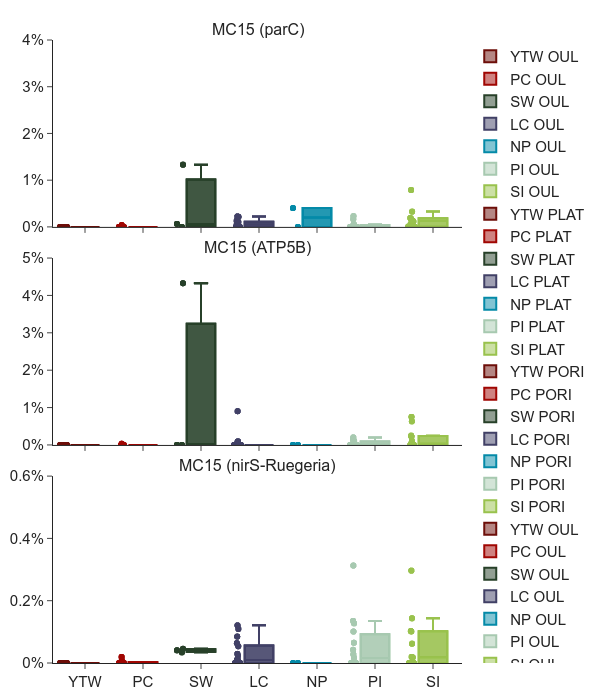

In [84]:
from collections import defaultdict
generename = {'parC':"parC",'ATP5B':"ATP5B",'nirS2':'nirS-Ruegeria'}
of2v = {}
ofs = []
mc = 'MC15'
fig = make_subplots(rows=3,cols=1,shared_xaxes=True,
                    vertical_spacing=0.05,
                    subplot_titles=[f"{mc.split('s')[0]} ({generename[gene]})" for gene in ['parC','ATP5B','nirS2']])
ordered_sites = ['YTW', 'PC', 'SW','LC', 'NP','PI', 'SI',  ]
for idx,gene in enumerate(['parC','ATP5B','nirS2']):
    indir = f'/mnt/ivy/thliao/project/coral_ruegeria/data_otheramplicons/results/amplicon_{gene}/20230811/Pdada2_output'
    norm_df = pd.read_csv(join(indir,'asv_IQtree/MC_abun.tsv'),sep='\t',index_col=0)
    norm_df = norm_df.reindex(gene2meta_fit[gene][2].index)
    norm_df.loc[:,'coral'] = [_.split('_')[1] for _ in norm_df.index]
    norm_df = norm_df.loc[norm_df.coral.isin(['OUL','PLAT','PORI'])]
    if mc not in norm_df.columns:
        norm_df.loc[:,mc]=0
    for coral,subdf in norm_df.groupby('coral'):
        site2mean = defaultdict(list)
        asv_d = norm_df[mc].to_dict()
        asv_d = {k:v for k,v in asv_d.items()}
        # if subdf[mc].median()>=1:
        #     print(mc,subdf[mc].median())
        #print(mc,subdf[mc].median())
        for s in ordered_sites:
            s = s #+f'_{coral}'
            xs = [_ for _ in norm_df.index if _.split('_')[0] == s]
            ys = [asv_d.get(_,0) if _ in asv_d else 0 for _ in xs]

            fig.append_trace(go.Box(
                name=s+' '+coral,
                marker=dict(color=cmap_l[s.split('_')[0]]),
                showlegend=True,boxpoints='all',
                x=[s]*len(ys), y=ys,
            ),idx+1,1)
            site2mean[s].append(np.mean(ys))
            #print(coral,s,ys)
        fig.layout.font.size=15
        fig.layout.template='simple_white'
        #fig.layout.title.text = f"{mc} ({gene})"
        #fig.layout.title.x = 0.5
        #fig.layout.xaxis.ticktext = xs
        #fig.layout.xaxis.tickvals = xs
        #fig.layout.yaxis.dtick = 5
        fig.update_yaxes(ticksuffix = '%')
        #fig.layout.update_yaxis.ticksuffix = '%'
        fig.layout.height = 700
        fig.layout.width = 600
        fig.update_layout(margin_l=10,margin_r=10,margin_t=40,margin_b=10)
        #max_v = np.max(site2mean['YTW'])
    fig.layout.yaxis1.range = [0,4]
    fig.layout.yaxis2.range = [0,5]
    fig.layout.yaxis3.range = [0,0.6]
    #fig.update_yaxes(dtick=0.5)
display(Image(fig.to_image()))

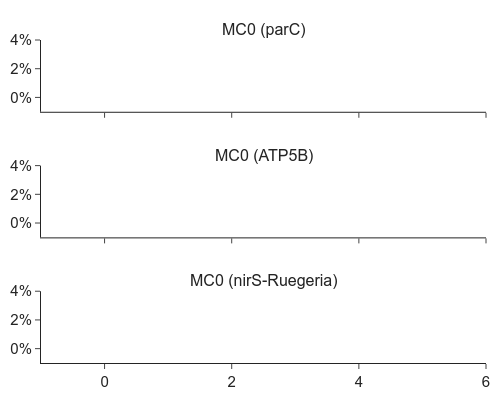

In [382]:
from collections import defaultdict
generename = {'parC':"parC",'ATP5B':"ATP5B",'nirS2':'nirS-Ruegeria'}
of2v = {}
ofs = []
for mc in all_mcs:
    if mc!='MC0':
        continue
    fig = make_subplots(rows=3,cols=1,shared_xaxes=True,
                        subplot_titles=[f"{mc.split('s')[0]} ({generename[gene]})" for gene in ['parC','ATP5B','nirS2']])
    ordered_sites = ['YTW', 'PC', 'SW','LC', 'NP','PI', 'SI',  ]
    for idx,gene in enumerate(['parC','ATP5B','nirS2']):
        indir = f'/mnt/ivy/thliao/project/coral_ruegeria/data_otheramplicons/results/amplicon_{gene}/20230811/Pdada2_output'
        norm_df = pd.read_csv(join(indir,'asv_IQtree/MC_abun.tsv'),sep='\t',index_col=0)
        norm_df = norm_df.reindex(gene2meta_fit[gene][2].index)
        norm_df.loc[:,'coral'] = [_.split('_')[1] for _ in norm_df.index]
        norm_df = norm_df.loc[norm_df.coral.isin(['OUL','PLAT','PORI'])]
        if mc not in norm_df.columns:
            norm_df.loc[:,mc]=0
        for coral,subdf in norm_df.groupby('coral'):
            site2mean = defaultdict(list)
            asv_d = norm_df[mc].to_dict()
            asv_d = {k:v for k,v in asv_d.items()}
            for s in ordered_sites:
                s = s+f'_{coral}'
                xs = [_ for _ in norm_df.index if _.split('_')[0] == s]
                ys = [asv_d.get(_,0) if _ in asv_d else 0 for _ in xs]
                fig.append_trace(go.Box(
                    name=s,
                    marker=dict(color=cmap_l[s.split('_')[0]]),
                    showlegend=False,boxpoints='all',
                    x=[s]*len(ys), y=ys,
                ),idx+1,1)
                site2mean[s].append(np.mean(ys))
            fig.layout.font.size=15
            fig.layout.template='simple_white'
            #fig.layout.title.text = f"{mc} ({gene})"
            #fig.layout.title.x = 0.5
            #fig.layout.xaxis.ticktext = xs
            #fig.layout.xaxis.tickvals = xs
            #fig.layout.yaxis.dtick = 5
            fig.update_yaxes(ticksuffix = '%')
            #fig.layout.update_yaxis.ticksuffix = '%'
            fig.layout.height = 400
            fig.layout.width = 500
            fig.update_layout(margin_l=10,margin_r=10,margin_t=40,margin_b=10)
            #max_v = np.max(site2mean['YTW'])
    display(Image(fig.to_image()))

In [394]:
from collections import defaultdict
generename = {'parC':"parC",'ATP5B':"ATP5B",'nirS2':'nirS-Ruegeria'}
of2v = {}
ofs = []
for mc in tqdm(all_mcs):
    fig = make_subplots(rows=3,cols=1,shared_xaxes=True,
                        subplot_titles=[f"{mc.split('s')[0]} ({generename[gene]})" for gene in ['parC','ATP5B','nirS2']])
    ordered_sites = ['YTW', 'PC', 'SW','LC', 'NP','PI', 'SI',  ]
    for idx,gene in enumerate(['parC','ATP5B','nirS2']):
        indir = f'/mnt/ivy/thliao/project/coral_ruegeria/data_otheramplicons/results/amplicon_{gene}/20230811/Pdada2_output'
        norm_df = pd.read_csv(join(indir,'asv_IQtree/MC_abun.tsv'),sep='\t',index_col=0)
        norm_df = norm_df.reindex(gene2meta_fit[gene][2].index)
        norm_df.loc[:,'coral'] = [_.split('_')[1] for _ in norm_df.index]
        norm_df = norm_df.loc[norm_df.coral.isin(['OUL','PLAT','PORI'])]
        if mc not in norm_df.columns:
            continue
        
        for coral,subdf in norm_df.groupby('coral'):
            asv_d = subdf[mc].to_dict()
            asv_d = {k:v for k,v in asv_d.items()}
            for s in ordered_sites:
                xs = [_ for _ in subdf.index if _.split('_')[0] == s]
                ys = [asv_d.get(_,0) if _ in asv_d else 0 for _ in xs]
                fig.append_trace(go.Box(
                    name=s+f'_{coral}',
                    marker=dict(color=cmap_l[s.split('_')[0]]),
                    showlegend=False,boxpoints='all',
                    x=[s+f'_{coral}']*len(ys), y=ys,
                ),idx+1,1)
            #print(subdf)
            fig.layout.font.size=15
            fig.layout.template='simple_white'
            fig.update_yaxes(ticksuffix = '%')
            fig.layout.height = 400
            fig.layout.width = 1000
            fig.update_layout(margin_l=10,margin_r=10,margin_t=40,margin_b=10)
    if len(fig.data)==0:
        continue
    #display(Image(fig.to_image()))
    f = f'/mnt/ivy/thliao/project/coral_ruegeria/ipynb/paper_denitrification/tmp/dis_{mc}_eachCoral.pdf'
    fig.write_image(f)
    ofs.append(f)

100%|██████████| 233/233 [00:54<00:00,  4.30it/s]


In [399]:
for idx,gene in enumerate(['parC','ATP5B','nirS2']):
    indir = f'/mnt/ivy/thliao/project/coral_ruegeria/data_otheramplicons/results/amplicon_{gene}/20230811/Pdada2_output'
    norm_df = pd.read_csv(join(indir,'asv_IQtree/MC_abun.tsv'),sep='\t',index_col=0)
    norm_df = norm_df.reindex(gene2meta_fit[gene][2].index)
    norm_df.loc[:,'coral'] = [_.split('_')[1] for _ in norm_df.index]
    norm_df = norm_df.loc[norm_df.coral.isin(['OUL','PLAT','PORI'])]
    norm_df.loc[:,'site'] = [_.split('_')[0] for _ in norm_df.index]
    d = norm_df.groupby(['coral','site']).mean()

In [ ]:

mcs = []
for (c,s),m2v in d.to_dict('index').items():
    top10 = sorted(m2v,key=lambda x:m2v[x])[-10:]
    mcs.extend(list(top10))
fulldf = pd.DataFrame(index=list(set(mcs)))
for (c,s),m2v in d.to_dict('index').items():
    top10 = sorted(m2v,key=lambda x:m2v[x])[-10:]
    for idx,m in enumerate(top10[::-1]):
        fulldf.loc[m,c+'_'+s] = idx+1
fulldf = fulldf.reindex(columns=sorted(['OUL_LC', 'OUL_PC', 'OUL_PI', 'OUL_SI', 'OUL_SW', 'OUL_YTW', 'PLAT_LC',
       'PLAT_PC', 'PLAT_PI', 'PLAT_SI', 'PORI_LC', 'PORI_NP', 'PORI_PI'],
       key=lambda x: (x.split('_')[0],ordered_sites.index( x.split('_')[1]))))

In [418]:
fulldf.to_excel('/mnt/ivy/thliao/project/coral_ruegeria/data_otheramplicons/ms_figures/top10MC.xlsx')

# Denitrification gene pattern

In [88]:
from collections import defaultdict
from ete3 import Tree
g2pop = pd.read_csv('/mnt/ivy/thliao/project/coral_ruegeria/Merged_popcogeneT/1783Ruegeria_MCs.tsv',sep='\t',index_col=0)
g2pop = g2pop['MC'].to_dict()
pop2g = defaultdict(list)
for g,pop in g2pop.items():
    pop2g[pop].append(g)

In [429]:
from api_tools.IO_for.itol import get_itoltree
tre = Tree('/mnt/ivy/thliao/project/coral_ruegeria/Merged_popcogeneT/phylogeny/bac120/bac120_over20p_LG.MVrooted.newick')

for name,cols in tqdm(fulldf.iteritems()):
    remaining_mcs = [_ for _ in list(cols[~cols.isna()].index) if _.startswith('MC')]
    subtre = tre.copy()
    gids = []
    for mc in remaining_mcs:
        gids+= pop2g[mc]
    subtre.prune(gids)
    treefile = './tmp.newick'
    subtre.write(outfile=treefile)
    get_itoltree(treefile,
                 outfile=f"/mnt/ivy/thliao/project/coral_ruegeria/tmp/{name}.pdf",
                 anno_files=['/mnt/ivy/thliao/project/coral_ruegeria/Merged_popcogeneT/genome2MC_lt3_colorstrip.txt',
                             f'/mnt/ivy/thliao/project/coral_ruegeria/ipynb/paper_denitrification/nap.itol.txt',
                             f'/mnt/ivy/thliao/project/coral_ruegeria/ipynb/paper_denitrification/nar.itol.txt',
                             f'/mnt/ivy/thliao/project/coral_ruegeria/ipynb/paper_denitrification/nir.itol.txt',
                             f'/mnt/ivy/thliao/project/coral_ruegeria/ipynb/paper_denitrification/nor.itol.txt',
                             f'/mnt/ivy/thliao/project/coral_ruegeria/ipynb/paper_denitrification/nos.itol.txt',
                             '/mnt/ivy/thliao/project/coral_ruegeria/Merged_popcogeneT/renamed_with_MC.txt'
                             ],
                 keys={'display_mode':'1',
                       'tree_x':'500',
                       'label_display':'1',
                       'ignore_branch_length':'0',
                       'line_width':"5"})
    #break

13it [03:02, 14.05s/it]


In [431]:
from api_tools.IO_for.itol import get_itoltree
tre = Tree('/mnt/ivy/thliao/project/coral_ruegeria/Merged_popcogeneT/phylogeny/bac120/bac120_over20p_LG.MVrooted.newick')

for mc in ['MC1','MC6','MC13','MC87','MC225']:
    #remaining_mcs = [_ for _ in list(cols[~cols.isna()].index) if _.startswith('MC')]
    subtre = tre.copy()
    gids = []
    gids+= pop2g[mc]
    subtre.prune(gids)
    treefile = './tmp.newick'
    subtre.write(outfile=treefile)
    get_itoltree(treefile,
                 outfile=f"/mnt/ivy/thliao/project/coral_ruegeria/tmp/denitrification{mc}.pdf",
                 anno_files=['/mnt/ivy/thliao/project/coral_ruegeria/Merged_popcogeneT/genome2MC_lt3_colorstrip.txt',
                             f'/mnt/ivy/thliao/project/coral_ruegeria/ipynb/paper_denitrification/nas.itol.txt',
                             f'/mnt/ivy/thliao/project/coral_ruegeria/ipynb/paper_denitrification/nap.itol.txt',
                             f'/mnt/ivy/thliao/project/coral_ruegeria/ipynb/paper_denitrification/nar.itol.txt',
                             f'/mnt/ivy/thliao/project/coral_ruegeria/ipynb/paper_denitrification/nir.itol.txt',
                             f'/mnt/ivy/thliao/project/coral_ruegeria/ipynb/paper_denitrification/nor.itol.txt',
                             f'/mnt/ivy/thliao/project/coral_ruegeria/ipynb/paper_denitrification/nos.itol.txt',
                             '/mnt/ivy/thliao/project/coral_ruegeria/Merged_popcogeneT/renamed_with_MC.txt'
                             ],
                 keys={'display_mode':'1',
                       'tree_x':'500',
                       'label_display':'1',
                       'ignore_branch_length':'0',
                       'line_width':"5"})
    #break

In [95]:
from api_tools.IO_for.itol import get_itoltree
from ete3 import Tree
tre = Tree('/mnt/ivy/thliao/project/coral_ruegeria/Merged_popcogeneT/phylogeny/bac120/bac120_over20p_LG.MVrooted.newick')

subtre = tre.copy()
gids = 'AL3,FO2,AE12,AP11,AG8,B4,A5,BG7,AN11,BK1'.split(',')

subtre.prune(gids)
treefile = './tmp.newick'
subtre.write(outfile=treefile)
get_itoltree(treefile,
             outfile=f"/mnt/ivy/thliao/project/coral_ruegeria/tmp/denitrification10.pdf",
             anno_files=['/mnt/ivy/thliao/project/coral_ruegeria/Merged_popcogeneT/genome2MC_lt3_colorstrip.txt',
                         f'/mnt/ivy/thliao/project/coral_ruegeria/ipynb/paper_denitrification/nas.itol.txt',
                         f'/mnt/ivy/thliao/project/coral_ruegeria/ipynb/paper_denitrification/nap.itol.txt',
                         f'/mnt/ivy/thliao/project/coral_ruegeria/ipynb/paper_denitrification/nar.itol.txt',
                         f'/mnt/ivy/thliao/project/coral_ruegeria/ipynb/paper_denitrification/nir.itol.txt',
                         f'/mnt/ivy/thliao/project/coral_ruegeria/ipynb/paper_denitrification/nor.itol.txt',
                         f'/mnt/ivy/thliao/project/coral_ruegeria/ipynb/paper_denitrification/nos.itol.txt',
                         '/mnt/ivy/thliao/project/coral_ruegeria/Merged_popcogeneT/phylogeny/renamed_with_MC.txt'
                         ],
             keys={'display_mode':'1',
                   'tree_x':'500',
                   'label_display':'1',
                   'ignore_branch_length':'0',
                   'line_width':"5"})

'http://itol.embl.de/external.cgi?tree=13718943246414581718589494&restore_saved=1'

In [369]:
    #f = f'/mnt/ivy/thliao/project/coral_ruegeria/ipynb/paper_denitrification/tmp/dis_{mc}.pdf'
    of2v[f] = max_v
    fig.write_image(f)
#     ofs.append(f)

In [ ]:
merged_pdfs(ofs,ofile=f"/mnt/ivy/thliao/project/coral_ruegeria/ipynb/paper_denitrification/tmp/dis_eachCoral.pdf",shape=2)


In [281]:
 
from PyPDF2 import PdfFileReader, PdfFileWriter, PdfFileMerger
from PyPDF2.pdf import PageObject
from decimal import Decimal
import io,os
from pdf2image import convert_from_path
from tqdm import tqdm
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import letter
from reportlab.pdfbase.ttfonts import TTFont
from reportlab.pdfbase import pdfmetrics

pdfmetrics.registerFont(TTFont('Arial-ita', '/home-user/thliao/.fonts/Arial Italic.ttf'))


def merged_pdfs(pdf_list,ofile='./tmp.pdf' ,shape=3):
    """
    It could only merged pdf into image. like png,jpeg
    
    shape is either a tuple or a intergrate. If it is a intergrate, it is taken as the number of cols. The number of cols will be calculated according to the number of pdf_list
    if it is a tuple, it shoule be (nrow,ncol)
    the order of the merged figures starts from the bottom left to bottom right.
    The also starts from 2nd row left to right
    """
    if type(shape) == int:
        suffix = 1 if len(pdf_list)%shape else 0
        nrow = len(pdf_list)//shape + suffix
        ncol = shape
    else:
        nrow,ncol = shape
    print(nrow,ncol)
    figs_pdf = []
    names = []
    for pdf in pdf_list:
        r = PdfFileReader(open(pdf,'rb'))
        figs_pdf.append(r.getPage(0))
        names.append(pdf.split('/')[-1].split('_')[0])
    w = figs_pdf[0].mediaBox.getWidth()
    h = figs_pdf[0].mediaBox.getHeight()
    aw = ncol*w; ah = nrow* (h )
    final_page = PageObject.createBlankPage(None, aw, ah)
    pos = (0,0)  #  x,y ; width, height
    for name,pdf_obj in tqdm(zip(names,figs_pdf)):
        #text_in_pdf = make_pdf_text(name,size=(10,10))
        fig_pos = (pos[0]*w, pos[1]*(h))
        final_page.mergeScaledTranslatedPage(pdf_obj, 1, fig_pos[0],fig_pos[1])  
        # mid_x = (w-10)/2
        # final_page.mergeScaledTranslatedPage(text_in_pdf, 1, fig_pos[0]+mid_x,fig_pos[1]+h+50)  
        if pos[0] == ncol-1:
            pos = (0,pos[1]+1)
        else:
            pos = (pos[0]+1,pos[1]) 
    pdf_write = PdfFileWriter()
    pdf_write.addPage(final_page)
    with open(ofile, 'wb') as fh:
        pdf_write.write(fh)

In [308]:
merged_pdfs(sorted(ofs,key=lambda x:d.loc[x.split('/')[-1].split('_')[-1].split('.')[0],'cosine distance to site YTW (parC)'])[::-1],
            ofile='/mnt/ivy/thliao/project/coral_ruegeria/data_otheramplicons/ms_figures/MC_distributions.pdf',shape=2)

9 2


18it [01:33,  5.18s/it]


## highlight MC in coral

In [322]:
from collections import defaultdict
from ete3 import Tree
g2pop = pd.read_csv('/mnt/ivy/thliao/project/coral_ruegeria/Merged_popcogeneT/1783Ruegeria_MCs.tsv',sep='\t',index_col=0)
g2pop = g2pop['MC'].to_dict()
pop2g = defaultdict(list)
for g,pop in g2pop.items():
    pop2g[pop].append(g)
    
all_gs = []
all_mcs = []
for tre in glob('/mnt/ivy/thliao/project/coral_ruegeria/Merged_popcogeneT/denitrification_gene_trees/*.treefile'):
    tre = Tree(tre)
    for t in tre.get_leaf_names():
        all_mcs.append(g2pop[t])
        all_gs.append(t)
all_mcs = set(all_mcs)
all_gs = set(all_gs)

In [336]:
generename = {'parC':"parC",'ATP5B':"ATP5B",'nirS2':'nirS-Ruegeria'}
thres = [0.1,0.5,1]
thres2mcs = {}
for idx,gene in enumerate(['parC','ATP5B','nirS2']):
    indir = f'/mnt/ivy/thliao/project/coral_ruegeria/data_otheramplicons/results/amplicon_{gene}/20230811/Pdada2_output'
    norm_df = pd.read_csv(join(indir,'asv_IQtree/MC_abun.tsv'),sep='\t',index_col=0)
    norm_df = norm_df.reindex(gene2meta_fit[gene][2].index)
    mc2avg_ab = norm_df.mean(0).to_dict()
    norm_df.loc[:,'site'] = [_.split('_')[0] for _ in norm_df.index]
    mc2s2v = norm_df.groupby('site').mean().to_dict()
    for t in thres:
        thres2mcs[t] = [mc 
                        for mc,s in mc2s2v.items() 
                        for l,v in s.items()
                        if v>=t and mc in all_mcs]


In [337]:
from api_tools.itol_func import to_binary_shape
g2eacht = defaultdict(list)
for t,mcs in thres2mcs.items():
    for mc in mcs:
        gs = [_ for _ in pop2g[mc] if _ in all_gs]
        for g in gs:
            g2eacht[g].append(f"lt {t}")
        

In [348]:
#t2color = {'lt 0.1':, 'lt 0.5', 'lt 1'}
text = to_binary_shape(g2eacht,same_color="#3568c2",unfilled_other=True,dataset_name='abundance filter')
with open('/mnt/ivy/thliao/project/coral_ruegeria/Merged_popcogeneT/denitrification_gene_trees/binary_abundanced_filter.txt','w') as f1:
    f1.write(text)
with open('/mnt/ivy/thliao/project/coral_ruegeria/Merged_popcogeneT/denitrification_gene_trees/genomes_with_highab.txt','w') as f1:
    f1.write('\n'.join(list(set(g2eacht))))

In [352]:
tre = Tree('/mnt/ivy/thliao/project/coral_ruegeria/Merged_popcogeneT/phylogeny/bac120/bac120_over20p_LG.MVrooted.newick')
MC2gids = defaultdict(list)
for g in tre.get_leaf_names():
    MC2gids[g2pop[g]].append(g)

In [364]:
from api_tools.itol_func import to_simple_bar
gene2c = {'ATP5B':'#1f77b4','parC':'#ff7f0e','nirS2':'#017712'}
generename = {'parC':"parC",'ATP5B':"ATP5B",'nirS2':'nirS-Ruegeria'}
for idx,gene in enumerate(['parC','ATP5B','nirS2']):
    indir = f'/mnt/ivy/thliao/project/coral_ruegeria/data_otheramplicons/results/amplicon_{gene}/20230811/Pdada2_output'
    norm_df = pd.read_csv(join(indir,'asv_IQtree/MC_abun.tsv'),sep='\t',index_col=0)
    norm_df = norm_df.reindex(gene2meta_fit[gene][2].index)
    mc2avg_ab = norm_df.mean(0).to_dict()
    g2avg_ab = {}
    for MC,gids in MC2gids.items():
        for g in gids:
            g2avg_ab[g] = -np.log(mc2avg_ab[MC]) if mc2avg_ab.get(MC,0)!=0 else 1e-10
    print(gene,mc2avg_ab['MC156'])
    text = to_simple_bar(g2avg_ab,dataset_name=f'{generename[gene]} amplicon data',other_params={'WIDTH,100':"WIDTH,50",
                                                                                     "COLOR,#ff0000":f"COLOR,{gene2c[gene]}",
                                                                                    "#MARGIN,0":"MARGIN,50"})
    with open(f'/mnt/ivy/thliao/project/coral_ruegeria/data_otheramplicons/results/bar_1783Ruegeria_Meanab_{gene}.txt','w') as f1:
        f1.write(text)
    #norm_df.loc[:,'site'] = [_.split('_')[0] for _ in norm_df.index]
    #print(gene,mc2avg_ab)

parC 0.0034469828101759688
ATP5B 0.02350173177597535
nirS2 0.004404712258170821


# reconstructions

In [135]:

from ete3 import Tree
import pandas as pd
from collections import defaultdict
from glob import glob
tre = Tree(f'/mnt/ivy/thliao/project/coral_ruegeria/Merged_popcogeneT/phylogeny/bac120/bac120_MVrooted_2305Ruegeria.newick')
gids = list(tre.get_leaf_names())
gids.remove('FO2')
genome_list = pd.read_excel('/mnt/ivy/thliao/project/coral_ruegeria/ipynb/paper_denitrification/used_geomes_Feb8.xlsx',index_col=0)

tre.prune(list(genome_list.index))
gids = tre.get_leaf_names()
gids.remove('GNM3486')
g2pop = pd.read_csv('/mnt/ivy/thliao/project/coral_ruegeria/Merged_popcogeneT/1837Ruegeria_MCs.tsv',sep='\t',index_col=0)
g2pop = g2pop['MC'].to_dict()
g2pop = {k:v for k,v in g2pop.items() if k in gids}
pop2g = defaultdict(list)
for g,pop in g2pop.items():
    if g in gids:
        pop2g[pop].append(g)


In [137]:
os.chdir('/mnt/ivy/thliao/project/coral_ruegeria/ipynb/paper_denitrification/AncestralReconstruction')

In [175]:
###########################################
### parse the results
###
###########################################

spe_mc = 'MC1,MC6,MC13,MC18'.split(',')
from ete3 import Tree
from tqdm import tqdm
spec_f = []
for f in tqdm(glob('ecceTERA/OG*/geneTree')):
    try:
        example1 = Tree(f)
    except:
        continue
    add_n = []
    spec = False
    for n in example1.traverse():
        leaves = [_.split('_')[0] for _ in n.get_leaf_names()]
        mc = [g2pop[_] for _ in leaves]
        diffmc = set(mc).difference(set(spe_mc))
        if len(diffmc)==0 and len(set(mc)) >1:
            spec = True
            add_n.append((n,';'.join(sorted(list((set(mc)))))))
        #     print(n,mc)
    if spec:
        spec_f.append((f,add_n))

100%|██████████| 3581/3581 [00:52<00:00, 67.93it/s] 


In [177]:
# for (tre,list_n) in spec_f:
#     for (n,_mc_concat) in list_n:
#         leaves = [_.split('_')[0] for _ in n.get_leaf_names()]
#         mc = [g2pop[_] for _ in leaves]
#         diffmc = set(mc).intersection(set(spe_mc))


In [178]:


#### angst

fs = glob('./angst/out/OG*/AnGST.newick')
angst_og = []
for f in tqdm(fs):
    example1 = Tree(f,format=3)
    add_n = []
    spec = False
    for n in example1.traverse():
        leaves = [_.split('_')[0] for _ in n.get_leaf_names()]
        mc = [g2pop[_] for _ in leaves]
        diffmc = set(mc).difference(set(spe_mc))
        if len(diffmc)==0 and len(set(mc)) >1:
            spec = True
            add_n.append((n,';'.join(sorted(list((set(mc)))))))
        #     print(n,mc)
    if spec:
        angst_og.append((f,add_n))
print(len(angst_og))


### 
OG_set1 = [_[0].split('/')[-2] for _ in spec_f ]
OG_set2 = [_[0].split('/')[-2] for _ in angst_og ]
shared_OG = set(OG_set1).intersection(set(OG_set2))
print(len(shared_OG))
union_OG = set(OG_set1).union(set(OG_set2))
print(len(union_OG))

with open('/mnt/ivy/thliao/project/coral_ruegeria/ipynb/paper_denitrification/AncestralReconstruction/ecceTERA_OG.list','w') as f1:
    f1.write('\n'.join(sorted(set(OG_set1))))
with open('/mnt/ivy/thliao/project/coral_ruegeria/ipynb/paper_denitrification/AncestralReconstruction/angst_OG.list','w') as f1:
    f1.write('\n'.join(sorted(set(OG_set2))))

100%|██████████| 3581/3581 [00:40<00:00, 89.39it/s] 

83
33
105


In [142]:
og_table = '/mnt/ivy/thliao/project/coral_ruegeria/ipynb/paper_denitrification/AncestralReconstruction/OG_results/of_out/Results_Feb12/Orthogroups/Orthogroups.tsv'
og_df = pd.read_csv(og_table,sep='\t',index_col=0)


In [148]:

target_genomes = ['AL3', 'AB11', 'L12', 'AG8', 'A5', 'AN11','BF4']

for g in target_genomes:
    print(g2pop.get(g,''))

MC1
MC6
MC13

MC0
MC26
MC18


In [147]:
#[_ for _ in final_genomes if g2pop.get(_,'')=='MC18']

['AD11', 'BF4', 'BF6', 'BF7']

In [149]:

kegg_df = pd.read_csv(
    '/mnt/ivy/thliao/project/coral_ruegeria/nanopore_processing/annotations/KEGG_anno_Revised.tsv', sep='\t', index_col=0)
subkegg_df = kegg_df.loc[[_ for _ in og_df.columns if _ in kegg_df.index],:]
locus2ko = {locus: ko
            for ko, _d in subkegg_df.to_dict().items()
            for genome, locus_list in _d.items()
            for locus in str(locus_list).split(',')}

subog_df = og_df.loc[shared_OG,:]
unionog_df = og_df.loc[union_OG,:]

collect_target_locus = []
ko_collect = []
for og,row in subog_df.iterrows():
    for genome,locus_ in row.to_dict().items():
        if genome in target_genomes and str(locus_) != 'nan':
            collect_target_locus.extend([_.strip() for _ in locus_.split(',')])
        if str(locus_) == 'nan':
            continue
        for l in locus_.split(','):
            if locus2ko.get(l.strip(),'NA')!='NA':
                ko_collect.append(locus2ko.get(l.strip(),'NA'))


eccetera = []
angst = []
for og,row in unionog_df.iterrows():
    for genome,locus_ in row.to_dict().items():
        if genome in target_genomes and str(locus_) != 'nan':
            collect_target_locus.extend([_.strip() for _ in locus_.split(',')])
        if str(locus_) == 'nan':
            continue
        for l in locus_.split(','):
            if locus2ko.get(l.strip(),'NA')!='NA' and og in OG_set1 and og not in OG_set2:
                eccetera.append(locus2ko.get(l.strip(),'NA'))
            if locus2ko.get(l.strip(),'NA')!='NA' and og in OG_set2 and og not in OG_set1:
                angst.append(locus2ko.get(l.strip(),'NA'))

ko2g_df = pd.read_csv(f"/mnt/maple/thliao/data/protein_db/kegg/ko_info.tab",sep='\t',header=None,index_col=0)
ko2g = {ko.split(':')[-1]:str(v).split(';')[0].strip() for ko,v in ko2g_df[1].to_dict().items()}
ko2info = {ko.split(':')[-1]:i for ko,i in ko2g_df[1].to_dict().items()}
ko2info['K26272'] = 'dgcN; D-glutamate N-acetyltransferase [EC:2.3.1.312]'
ko2info['K23997'] = 'nnr; ADP-dependent NAD(P)H-hydrate dehydratase / NAD(P)H-hydrate epimerase [EC:4.2.1.136 5.1.99.6]'



In [150]:


g2ipr_dfs = {g:f.split('/')[-1].split('.')[0] 
           for f in glob('/mnt/ivy/thliao/project/coral_ruegeria/nanopore_processing/annotations/ipr/*.anno/*.tsv')}
_locus2og = {}
allprot = []
for genome,col in tqdm(unionog_df.iteritems()):
    l2faa = {seq.id:seq for seq in SeqIO.parse(f"/mnt/ivy/thliao/project/coral_ruegeria/Merged_popcogeneT/inproteins/{genome}.faa",'fasta')}
    for og,locus_ in col.to_dict().items():
        if str(locus_) == 'nan':
            continue        
        for l in locus_.split(','):
            allprot.append(l2faa[l.strip()])
            _locus2og[l] = og
with open('./union_OG.faa','w') as f1:
    SeqIO.write(allprot,f1,'fasta-2line')


125it [00:19,  6.36it/s]


In [151]:

rows = []
for row in open('/mnt/ivy/thliao/project/coral_ruegeria/ipynb/paper_denitrification/AncestralReconstruction/ipr/union_OG.faa.tsv').read().strip().split('\n'):
    rows.append(row.split('\t')) 
databases = set([rows[3] for rows in rows])
db2locus2info = defaultdict(dict)
for row in rows:
    db2locus2info[row[3]][row[0]] = [row[4],row[5],row[11],row[12]]
    db2locus2info['interpro'][row[0]] = [row[11],row[12]]
from collections import Counter
with open('./OG_functions.tsv','w') as f1:
    f1.write(f"OG number\tKEGG number\tKEGG Description\tinterpro number\tinterpro description\tPANTHER number\tPANTHER description\tCDD number\tCDD description\tFound by Software\n")
    for og in union_OG:
        locus_list = [locus.strip() for locus,og_ in _locus2og.items() if og_ == og]
        kos = [locus2ko.get(_,'') for _ in locus_list]
        kos = Counter([_ for _ in kos if _])
        if len(kos)!=0:

            ko = kos.most_common(1)[0][0]
        else:
            ko = 'NA'
        interpro = [db2locus2info['interpro'].get(_,'') for _ in locus_list]
        interpro = [_ for _ in interpro if _ ]
        if len(interpro)!=0:
            p = Counter([_[0] for _ in interpro]).most_common(1)[0][0]
            interpro_info = [_ for _ in interpro if _[0] == p][0]
        else:
            interpro_info = ['NA','NA']

        panther = [db2locus2info['PANTHER'].get(_,'') for _ in locus_list]
        panther = [_ for _ in panther if _ ]
        if len(panther)!=0:
            p = Counter([_[0] for _ in panther]).most_common(1)[0][0]
            panther_info = [_ for _ in panther if _[0] == p][0]
        else:
            panther_info = ['NA','NA']
        cdd = [db2locus2info['CDD'].get(_,'') for _ in locus_list]
        cdd = [_ for _ in cdd if _ ]
        if len(cdd)!=0:
            p = Counter([_[0] for _ in cdd]).most_common(1)[0][0]
            cdd_info = [_ for _ in cdd if _[0] == p][0]
        else:
            cdd_info = ['NA','NA']
        if og in OG_set1 and og in OG_set2:
            t = 'both'
        elif og in OG_set1 and og not in OG_set2:
            t = 'ecceTERA'
        elif og not in OG_set1 and og  in OG_set2:
            t = 'angst'
        f1.write(f"{og}\t{ko}\t{ko2info.get(ko,'NA')}\t{interpro_info[0]}\t{interpro_info[1].capitalize()}\t{panther_info[0]}\t{panther_info[1].capitalize()}\t{cdd_info[0]}\t{cdd_info[1]}\t{t}\n")

d = pd.read_csv('./OG_functions.tsv',sep='\t',index_col=0)
d = d.applymap(lambda x: 'NA' if x == '-' else x)
d.to_excel('OG_functions.xlsx')

In [181]:
d.loc[d['KEGG number'].isin(['K19340','K19342']),:]

,KEGG number,KEGG Description,interpro number,interpro description,PANTHER number,PANTHER description,CDD number,CDD description,Found by Software
OG number,,,,,,,,,
OG0003003,K19342,nosL; copper chaperone NosL,NA,NA,PTHR41247,Hth-type transcriptional repressor ycnk,NaN,NaN,both
OG0003005,K19340,nosF; Cu-processing system ATP-binding protein,IPR027417,P-loop containing nucleoside triphosphate hydr...,PTHR42939,Abc transporter atp-binding protein albc-related,cd03230,ABC_DR_subfamily_A,angst
OG0002611,K19340,nosF; Cu-processing system ATP-binding protein,IPR017850,"Alkaline-phosphatase-like, core domain superfa...",PTHR42693,Arylsulfatase family member,NaN,NaN,both
OG0000047,K19342,nosL; copper chaperone NosL,IPR011990,Tetratricopeptide-like helical domain superfamily,PTHR12558,"Cell division cycle 16,23,27",NaN,NaN,angst


In [193]:
for og in d.loc[d['KEGG number'].isin(['K19340','K19342']),:].index:
    print(og,d.loc[og,'KEGG Description'].split(';')[0],[_ for _ in spec_f if og in _[0]])

OG0003003 nosL [('ecceTERA/OG0003003/geneTree', [(Tree node '' (0x7f6466b8791), 'MC13;MC6')])]
OG0003005 nosF []
OG0002611 nosF [('ecceTERA/OG0002611/geneTree', [(Tree node '' (0x7f6466b11a9), 'MC1;MC13')])]
OG0000047 nosL []


In [192]:
for og in d.loc[d['KEGG number'].isin(['K19340','K19342']),:].index:
    print(og,d.loc[og,'KEGG Description'].split(';')[0],[_ for _ in angst_og if og in _[0]])

OG0003003 nosL [('./angst/out/OG0003003/AnGST.newick', [(Tree node 'AB11' (0x7f646615159), 'MC13;MC6')])]
OG0003005 nosF [('./angst/out/OG0003005/AnGST.newick', [(Tree node 'AB11' (0x7f646504f09), 'MC1;MC6')])]
OG0002611 nosF [('./angst/out/OG0002611/AnGST.newick', [(Tree node 'L12' (0x7f6466434b5), 'MC1;MC13')])]
OG0000047 nosL [('./angst/out/OG0000047/AnGST.newick', [(Tree node 'L12' (0x7f646656b95), 'MC1;MC13')])]


In [154]:
existed_excel = '''KEGG number	Description	Category	Found by Software
K23536	nupC; general nucleoside transport system permease protein	Transport	both
K08720	ompU; outer membrane protein OmpU	Adhesion	both
K11690	dctM; C4-dicarboxylate transporter, DctM subunit	Transport	both
K03611	dsbB; disulfide bond formation protein DsbB	Development	both
K01710	E4.2.1.46, rfbB, rffG; dTDP-glucose 4,6-dehydratase [EC:4.2.1.46]	Metabolism	both
K06902	UMF1; MFS transporter, UMF1 family	Transport	both
K03474	pdxJ; pyridoxine 5-phosphate synthase [EC:2.6.99.2]	Vitamin B6 synthesis	both
K15034	yaeJ; ribosome-associated protein	Development	both
K01026	pct; propionate CoA-transferase [EC:2.8.3.1]	Metabolism	both
K00973	E2.7.7.24, rfbA, rffH; glucose-1-phosphate thymidylyltransferase [EC:2.7.7.24]	Biosynthesis	both
K05799	pdhR; GntR family transcriptional regulator, transcriptional repressor for pyruvate dehydrogenase complex	Metabolism	both
K03574	mutT, NUDT15, MTH2; 8-oxo-dGTP diphosphatase [EC:3.6.1.55]	Oxidative stress	both
K01266	dmpA, dap; D-aminopeptidase [EC:3.4.11.19]	Development	both
K02002	proX; glycine betaine/proline transport system substrate-binding protein	Transport	both
K09022	ridA, tdcF, RIDA; 2-iminobutanoate/2-iminopropanoate deaminase [EC:3.5.99.10]	Metabolism	both
K01040	gctB; glutaconate CoA-transferase, subunit B [EC:2.8.3.12]	Metabolism	both
K00948	PRPS, prsA; ribose-phosphate pyrophosphokinase [EC:2.7.6.1]	Biosynthesis	both
K00067	rfbD, rmlD; dTDP-4-dehydrorhamnose reductase [EC:1.1.1.133]	Metabolism	both
K02888	RP-L21, MRPL21, rplU; large subunit ribosomal protein L21	Development	both
K00813	aspC; aspartate aminotransferase [EC:2.6.1.1]	Amino acids metabolism and nitrogen transport	both
K07497	K07497; putative transposase	Transposase	both
K12454	rfbE; CDP-paratose 2-epimerase [EC:5.1.3.10]	Biosynthesis	both
K15973	mhqR; MarR family transcriptional regulator, 2-MHQ and catechol-resistance regulon repressor	enhancing  stress resistance and adaptability 	both
K17486	dmdA; dimethylsulfoniopropionate demethylase [EC:2.1.1.269]	DMSP metabolism	both
K05834	rhtB; homoserine/homoserine lactone efflux protein	Quorum sensing	both
K00451	HGD, hmgA; homogentisate 1,2-dioxygenase [EC:1.13.11.5]	Metabolism	ecceTERA
K00627	DLAT, aceF, pdhC; pyruvate dehydrogenase E2 component (dihydrolipoamide acetyltransferase) [EC:2.3.1.12]	Metabolism	ecceTERA
K00799	GST, gst; glutathione S-transferase [EC:2.5.1.18]	Transport	ecceTERA
K01118	acpD, azoR; FMN-dependent NADH-azoreductase [EC:1.7.1.17]	-	ecceTERA
K01652	E2.2.1.6L, ilvB, ilvG, ilvI; acetolactate synthase I/II/III large subunit [EC:2.2.1.6]	Biosynthesis	ecceTERA
K02028	ABC.PA.A; polar amino acid transport system ATP-binding protein [EC:7.4.2.1]	Transport	ecceTERA
K03536	rnpA; ribonuclease P protein component [EC:3.1.26.5]	Biosynthesis	ecceTERA
K03808	pqiA; paraquat-inducible protein A	Oxidative stress	ecceTERA
K04765	mazG; nucleoside triphosphate diphosphatase [EC:3.6.1.9]	Energy supplement, signalling	ecceTERA
K07018	K07018; uncharacterized protein	-	ecceTERA
K07305	msrB; peptide-methionine (R)-S-oxide reductase [EC:1.8.4.12]		ecceTERA
K07795	tctC; putative tricarboxylic transport membrane protein	Transport	ecceTERA
K09794	K09794; uncharacterized protein	-	ecceTERA
K09972	aapP, bztD; general L-amino acid transport system ATP-binding protein [EC:7.4.2.1]	Transport	ecceTERA
K10004	gltL, aatP; glutamate/aspartate transport system ATP-binding protein [EC:7.4.2.1]	Transport	ecceTERA
K19342	nosL; copper chaperone NosL	nosZ accessory gene 	ecceTERA
K23064	lhpO; hydroxyproline transport system ATP-binding protein [EC:7.4.2.1]	Transport	ecceTERA
K25307	wzb, etp; low molecular weight protein-tyrosine phosphatase [EC:3.1.3.48]	Oxidative stress	ecceTERA
K00206	phnY; phosphonoacetaldehyde dehydrogenase [EC:1.2.1.-]	Organophosphate compound metabolism	Angst
K01142	E3.1.11.2, xthA; exodeoxyribonuclease III [EC:3.1.11.2]	DNA repair	Angst
K01159	ruvC; crossover junction endodeoxyribonuclease RuvC [EC:3.1.22.4]	DNA repair	Angst
K01247	alkA; DNA-3-methyladenine glycosylase II [EC:3.2.2.21]	DNA repair	Angst
K01434	E3.5.1.11; penicillin amidase [EC:3.5.1.11]	Antibitotic synthesis	Angst
K01480	speB; agmatinase [EC:3.5.3.11]	Metabolism	Angst
K01595	ppc; phosphoenolpyruvate carboxylase [EC:4.1.1.31]	Energy supplement, Complements the intermediates of the TCA cycle	Angst
K01997	livH; branched-chain amino acid transport system permease protein	Transport	Angst
K02000	proV; glycine betaine/proline transport system ATP-binding protein [EC:7.6.2.9]	Transport	Angst
K02001	proW; glycine betaine/proline transport system permease protein	Transport	Angst
K02020	modA; molybdate transport system substrate-binding protein	Transport	Angst
K02065	mlaF, linL, mkl; phospholipid/cholesterol/gamma-HCH transport system ATP-binding protein	Transport	Angst
K02199	ccmG, dsbE; cytochrome c biogenesis protein CcmG, thiol:disulfide interchange protein DsbE	Metabolism	Angst
K02450	gspA; general secretion pathway protein A	Development	Angst
K02535	lpxC; UDP-3-O-[3-hydroxymyristoyl] N-acetylglucosamine deacetylase [EC:3.5.1.108]	Metabolism	Angst
K03086	rpoD; RNA polymerase primary sigma factor	Development	Angst
K03310	TC.AGCS; alanine or glycine:cation symporter, AGCS family	Development	Angst
K03465	thyX, thy1; thymidylate synthase (FAD) [EC:2.1.1.148]	DNA synthesis 	Angst
K03685	rnc, DROSHA, RNT1; ribonuclease III [EC:3.1.26.3]	Development	Angst
K03851	tpa; taurine-pyruvate aminotransferase [EC:2.6.1.77]	Nitrogen balance	Angst
K04078	groES, HSPE1; chaperonin GroES	Nitrogen metabolism	Angst
K04751	glnB; nitrogen regulatory protein P-II 1	Nitrogen metabolism	Angst
K04752	glnK; nitrogen regulatory protein P-II 2	Nitrogen metabolism	Angst
K05946	tagA, tarA; N-acetylglucosaminyldiphosphoundecaprenol N-acetyl-beta-D-mannosaminyltransferase [EC:2.4.1.187]	Biosynthesis	Angst
K06976	K06976; uncharacterized protein	-	Angst
K12255	gbuA; guanidinobutyrase [EC:3.5.3.7]	Nitrogen metabolism	Angst
K15269	pecM; probable blue pigment (indigoidine) exporter	Biosynthesis	Angst
K16566	exoY; exopolysaccharide production protein ExoY	Transport	Angst
K18900	bpeT; LysR family transcriptional regulator, regulator for bpeEF and oprC	enhancing  stress resistance and adaptability 	Angst
K19340	nosF; Cu-processing system ATP-binding protein	nosZ accessory gene 	Angst
K21395	yiaO; TRAP-type transport system periplasmic protein	Transport	Angst
K21698	aaeR; LysR family transcriptional regulator, transcriptional activator for aaeXAB operon	Adaptation to the acid env	Angst'''
existed_excel = pd.read_csv(io.StringIO(existed_excel),sep='\t',index_col=0)


In [160]:
diffkegg = list(set(d['KEGG number']).difference(set(existed_excel.index)))


In [167]:
removedkegg = list(set(existed_excel.index).difference(set(d['KEGG number'])))


In [171]:
existed_excel.loc[removedkegg,'removed'] = 'Yes'

In [163]:
subsetd = d.loc[d['KEGG number'].isin(diffkegg),:]
for _,row in subsetd.iterrows():
    existed_excel.loc[row['KEGG number'],:] = [row['KEGG Description'],'',row['Found by Software']]


In [172]:
existed_excel.to_excel('OG_functions_updated.xlsx')

In [153]:
!pwd

/mnt/ivy/thliao/project/coral_ruegeria/ipynb/paper_denitrification/AncestralReconstruction


In [173]:
!sz2 OG_functions_updated.xlsx

OG_functions_updated.xlsx                     100%   12KB  12.0KB/s   00:00    
